## Install all key packages

INSERT YOUR GROUP NUMBER: 5

In [ ]:
import kagglehub
from kagglehub import KaggleDatasetAdapter
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import confusion_matrix,cohen_kappa_score
from statistics import mean, stdev
from sklearn import preprocessing
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
from sklearn.svm import LinearSVC, SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier

# Instructions
By now, you have seen the majority of code required for this project in class or in your homework assignment. You are to complete a series of parts for this project. They include:

1.   Describing your data (no code)
2.   Data Exploration
3.   Supervised Learning
4.   Unsupervised Learning

Within each section, you are asked to perform a series of analyses. Work smart. Work with each other. Be sure to adapt prior code.

**For the project, I have provided specific instructions but there is no "cheat sheet." The questions are adapted from prior scripts and/or assignments. This should not surprise you. Good luck!**



# Part 1: Describe your data (18 points)
This is conceptual. Please write full responses to the questions. Otherwise, points will be deducted.



**1. Desribe your dataset in 3-4 sentences (5 points)**

The dataset we use for our analysis is the student performance & behavior dataset from a private learning provider. The dataset contains 5,000 observations, with each entry representing a student. It features 23 columns, capturing demographic details, academic performance, personal habits, parental and socioeconomic factors. The dataset includes numerical, categorical, and text values, providing a comprehensive view of student characteristics and academic outcomes.



**2. What research question are you trying to answer? (2 points)**

Can students' total academic scores be accurately predicted using factors such as gender, age, major, study hours per week, class attendance rate, participation in extracurricular activities, stress level, sleep hours per night, internet access at home, parental education level, and family income level? This project aims to build a predictive model to determine how well these variables can forecast students' overall academic performance.

**3. What are your features? How many are there in total? (2 points)**

For this analysis, we focused on 11 key features that may influence student performance and well-being. These include **gender (Gender)**, categorized as Male, Female, or Other, and **age (Age)**, which ranges from 18 to 24 years old. The **department (Department)** refers to the student's major, including Computer Science (CS), Engineering, Business, and Mathematics. We also considered **attendance percentage (Attendance)**, representing students' attendance throughout the semester, ranging from 0% to 100%, and **average study hours per week (Study_Hours_per_Week)**,reflecting the average duration students spend on studying every week.

Additionally, we accounted for **participation in extracurricular activities (Extracurricular_Activities)**, indicated as Yes or No, and **internet access at home (Internet_Access_at_Home)**, also marked as Yes or No. **Parental education level (Parent_Education_Level)** reflects the highest educational attainment of the student's parents, including None, High School, Bachelor's, Master's, or PhD. **Family income level (Family_Income_Level)** is categorized as Low, Medium, or High. Lastly, we considered students' self-reported **stress level (Stress_Level)**, ranging from 1 (low) to 10 (high), and **sleep hours per night (Sleep_Hours_per_Night)**, reflecting students' average sleeping duration.

**4. What is your label? (2 points)**

For this analysis, the label will be the **total scores (Total_Score)**, which is the weighted sum of all grades, including midterm exam score, final exam score, average score of all assignments, average quiz score, score based on class participation, and project evaluation score.

**5. If your label is a continuous variable, how will you dichtomoize it (i.e., turn it into a 0/1 indicator)? (2 points)**

To dichotomize the continuous label total score (Total_Score), which representes the weighted sum of varioues types of grades mentioned in the previous question (Question 4), we will use the median score as the threshold to divided the data into higher performers and low performers. Students whose total score is equal to or greater than the median will be assigned a 1 (high performers), while those below the median will be assigned a 0 (low performers).




**6. Please provide a hypothesis as to what you believe the relationship between your features and label to be? Please provide a justficiation for your hypothesis (this does not require any research; just use your logic; this should be 4-5 sentences) (5 points)**

Our hypothesis states that features such as the number of hours students spend studying per week (Study_Hours_per_Week), percentage of attendance (Attendance (%)), self-reported stress level of the student (Stress_Level), and number of hours students spend sleeping per night (Sleep_Hours_per_Night) will likely be strong predictors of students' total score (Total_Score), since they directly relate to a student’s academic engagement and well-being. In addition, the highest education level of parents (Parent_Education_Level) and whether the student has access to internet at home (Internet_Access_at_Home) may also be a strong predictor of total score, as it determines  the students’ access to academic resources and support systems, which ultimately will likely have impact on their academic performances. On the other hand, features relating to the demographic information of the students, such as gender, age, and department, are less likely to be predictive, since these attributes do not directly affect a student’s academic behaviors or access to learning resources.



# Part 2: Data Exploration (42 points)
Please answer all questions. Make sure everything is displayed so the TA's can easily grade each question. HINT: week 9 python script for Boston Housing data will be very helpful for this section.

**1. Import data set. Show the first five rows of data (2 points)**

In [ ]:
#Import data set, show the first five rows of the data
df1 = kagglehub.load_dataset(
    KaggleDatasetAdapter.PANDAS,
    "mahmoudelhemaly/students-grading-dataset",
    "Students_Grading_Dataset.csv"
)

df = pd.DataFrame(df1)
df.head()

<ipython-input-2-cb1c7cabb585>:2: DeprecationWarning: load_dataset is deprecated and will be removed in a future version.
  df1 = kagglehub.load_dataset(


100%|██████████| 700k/700k [00:00<00:00, 2.30MB/s]


,Student_ID,First_Name,Last_Name,Email,Gender,Age,Department,Attendance (%),Midterm_Score,Final_Score,...,Projects_Score,Total_Score,Grade,Study_Hours_per_Week,Extracurricular_Activities,Internet_Access_at_Home,Parent_Education_Level,Family_Income_Level,Stress_Level (1-10),Sleep_Hours_per_Night
0,S1000,Omar,Williams,student0@university.com,Female,22,Mathematics,97.36,40.61,59.61,...,62.84,83.49,C,10.3,Yes,No,Master's,Medium,1,5.9
1,S1001,Maria,Brown,student1@university.com,Male,18,Business,97.71,57.27,74.00,...,98.23,92.29,F,27.1,No,No,High School,Low,4,4.3
2,S1002,Ahmed,Jones,student2@university.com,Male,24,Engineering,99.52,41.84,63.85,...,91.22,93.55,F,12.4,Yes,No,High School,Low,9,6.1
3,S1003,Omar,Williams,student3@university.com,Female,24,Engineering,90.38,45.65,44.44,...,55.48,51.03,A,25.5,No,Yes,High School,Low,8,4.9
4,S1004,John,Smith,student4@university.com,Female,23,CS,59.41,53.13,61.77,...,87.43,90.91,A,13.3,Yes,No,Master's,Medium,6,4.5


**2. Display dimension of the data (2 points)**

In [ ]:
#before dropping unnecessary features
print(df.shape)

(5000, 23)


In [ ]:
#after dropping unnecessary features
df = df.dropna()
df_desc = df.drop(columns=['Student_ID', 'First_Name', 'Last_Name', 'Email','Midterm_Score','Final_Score','Assignments_Avg','Quizzes_Avg','Participation_Score','Projects_Score','Grade'])
print(df_desc.shape)

(3975, 12)


**3. Summarize the data to see the distribution of data (all of your features and label) (2 points)**

In [ ]:
# description for numeric variables
df_desc.describe()

,Age,Attendance (%),Total_Score,Study_Hours_per_Week,Stress_Level (1-10),Sleep_Hours_per_Night
count,3975.000000,3975.000000,3975.000000,3975.000000,3975.000000,3975.000000
mean,21.052327,75.281909,74.963927,17.569308,5.504906,6.511245
std,1.993770,14.458947,14.360438,7.205194,2.888624,1.442410
min,18.000000,50.020000,50.020000,5.000000,1.000000,4.000000
25%,19.000000,62.660000,62.535000,11.500000,3.000000,5.300000
50%,21.000000,75.570000,75.190000,17.500000,6.000000,6.500000
75%,23.000000,87.930000,87.055000,23.800000,8.000000,7.800000
max,24.000000,100.000000,99.990000,30.000000,10.000000,9.000000


In [ ]:
# description for categorical variables
# Separate numeric and categorical columns
numeric_cols = df_desc.select_dtypes(include='number').columns
categorical_cols = df_desc.select_dtypes(exclude='number').columns

# Frequency counts for categorical variables
print("\nCategorical Variables Description:\n")
for col in categorical_cols:
    print(f"\nColumn: {col}")
    print(df_desc[col].value_counts(dropna=False))


Categorical Variables Description:


Column: Gender
Gender
Male      2027
Female    1948
Name: count, dtype: int64

Column: Department
Department
Business       1020
Engineering    1018
CS              971
Mathematics     966
Name: count, dtype: int64

Column: Extracurricular_Activities
Extracurricular_Activities
Yes    2010
No     1965
Name: count, dtype: int64

Column: Internet_Access_at_Home
Internet_Access_at_Home
No     1989
Yes    1986
Name: count, dtype: int64

Column: Parent_Education_Level
Parent_Education_Level
Bachelor's     1020
PhD            1012
Master's       1000
High School     943
Name: count, dtype: int64

Column: Family_Income_Level
Family_Income_Level
Medium    1347
Low       1339
High      1289
Name: count, dtype: int64


**4. Display the boxplots of your data (all of your features and label) (2 points)**

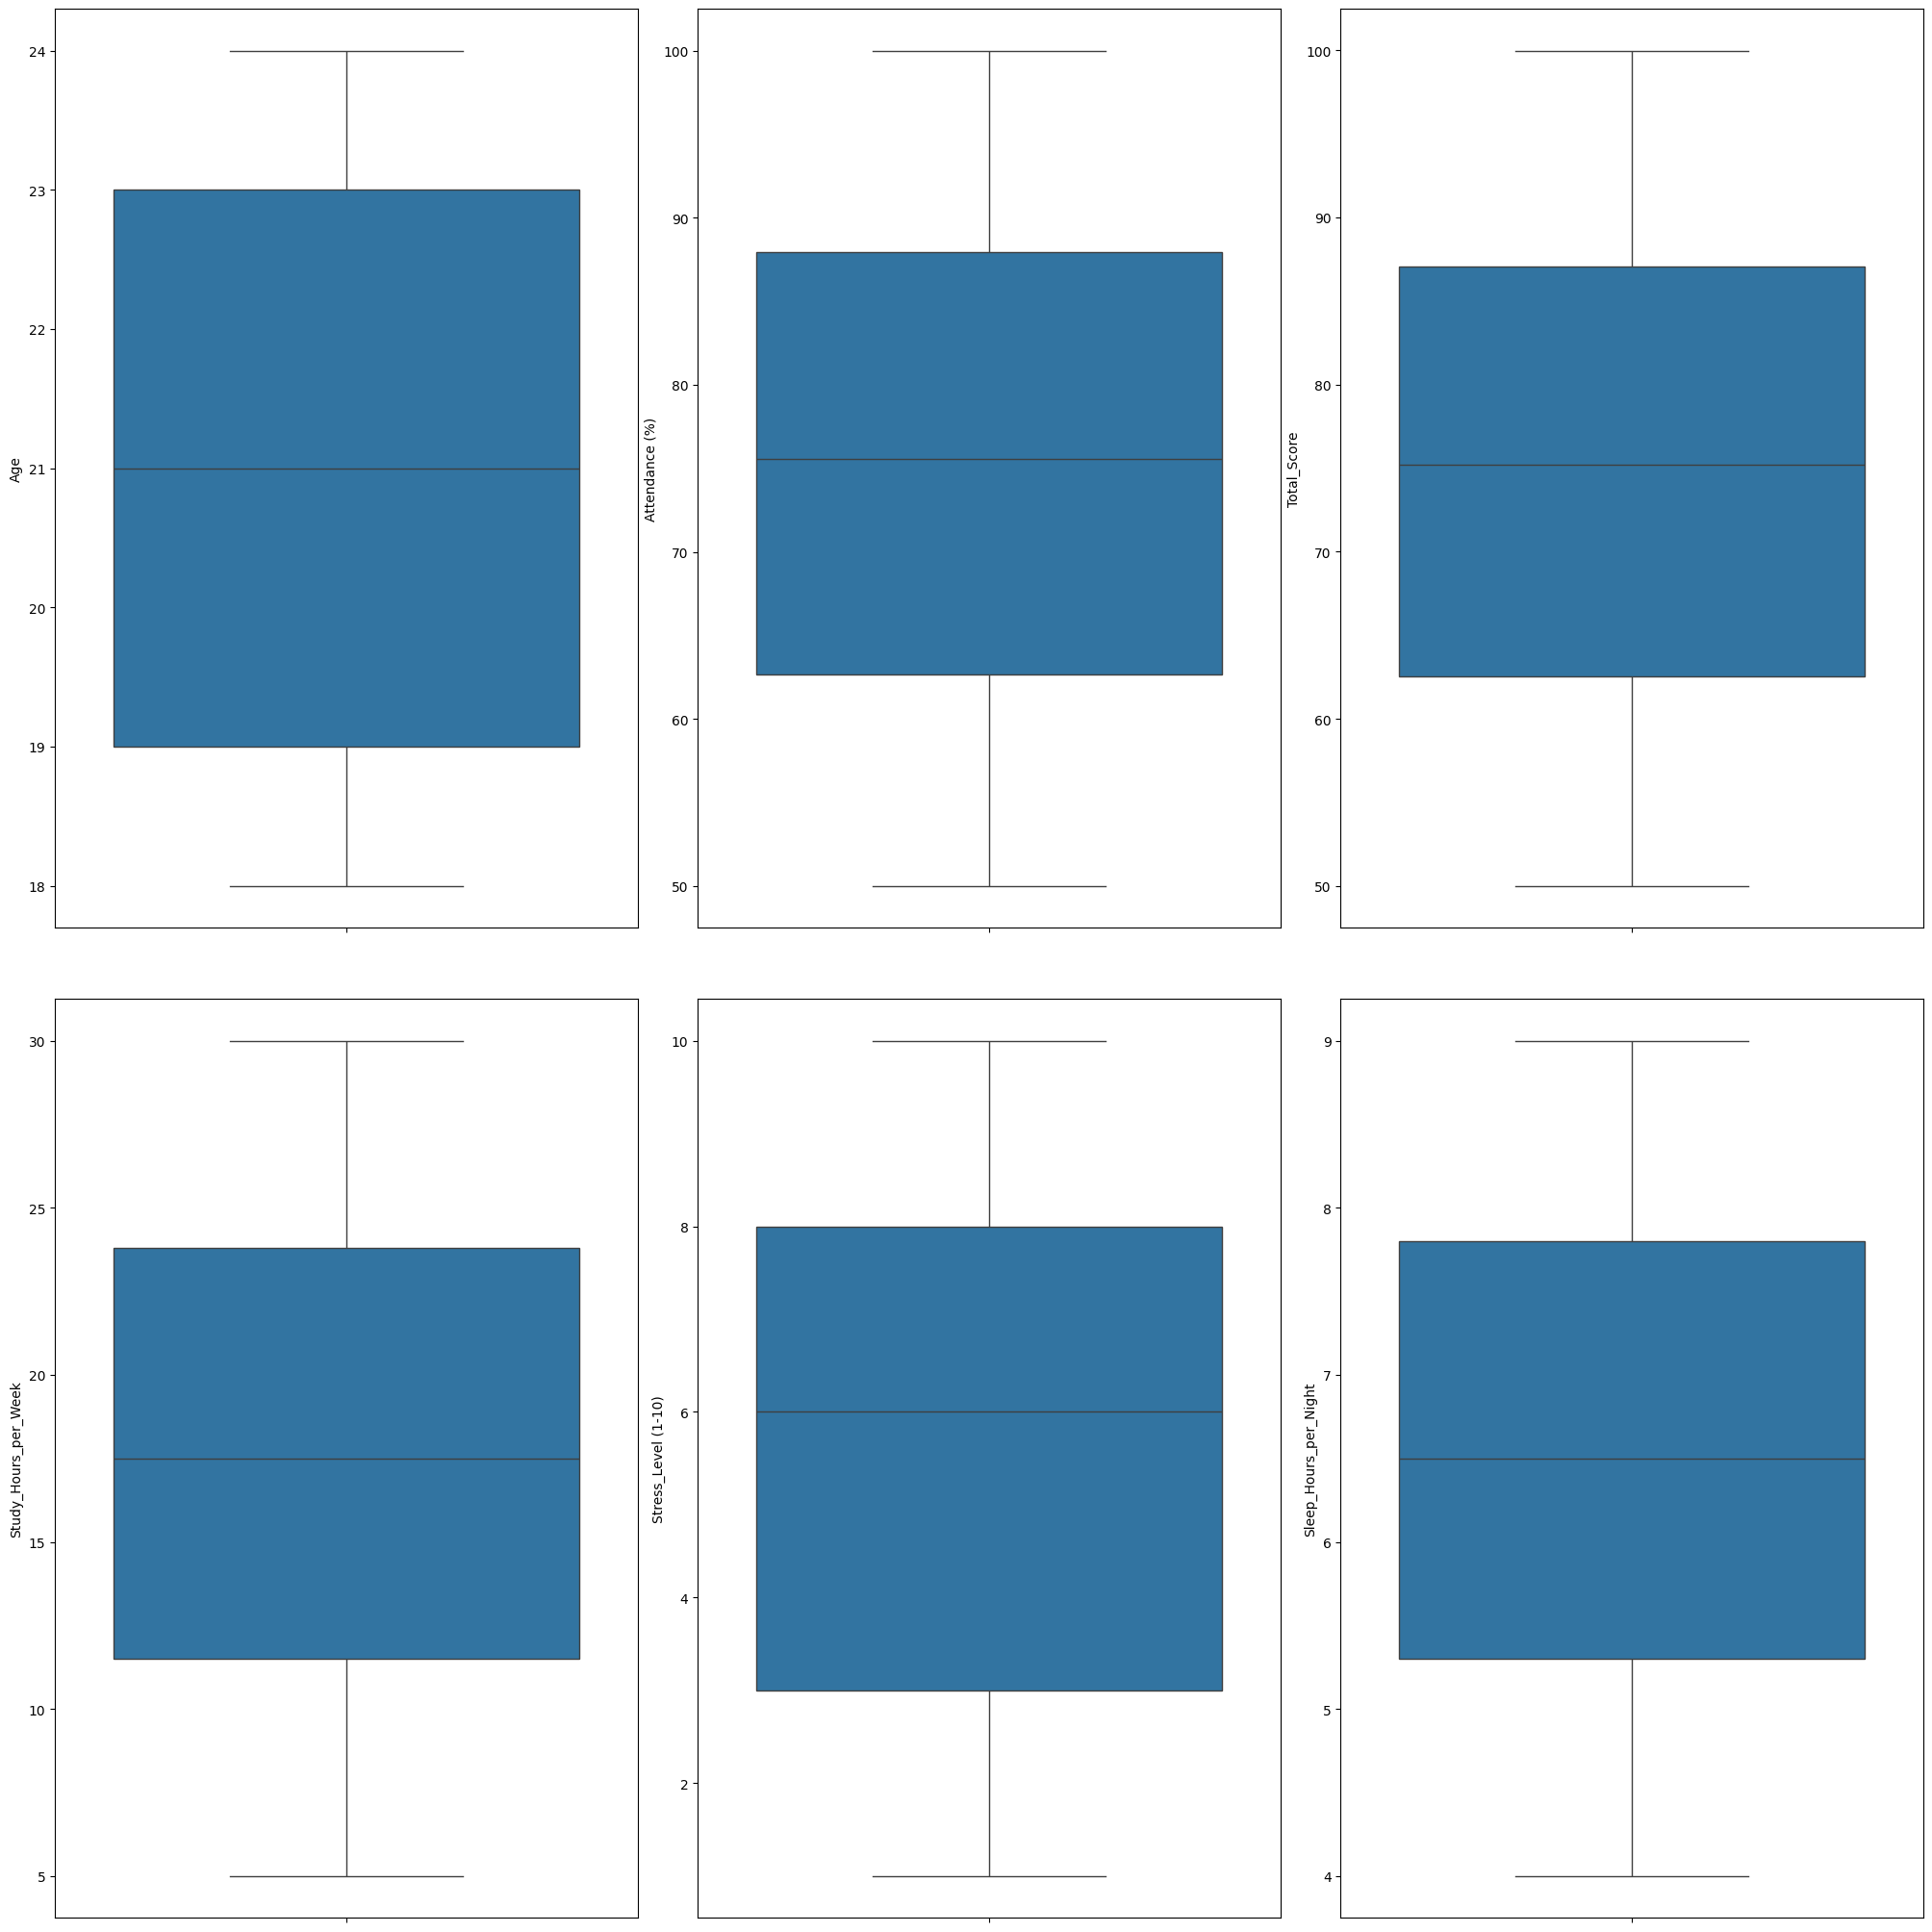

In [ ]:
# an overall version of boxplots
fig,axs=plt.subplots(ncols=3,nrows=2, figsize=(20,20))
index=0
axs=axs.flatten()
for k,v in df_desc[numeric_cols].items():
    sns.boxplot(y=k, data=df_desc[numeric_cols], ax=axs[index])
    index+=1
plt.tight_layout(pad=.4,w_pad=.5,h_pad=5)

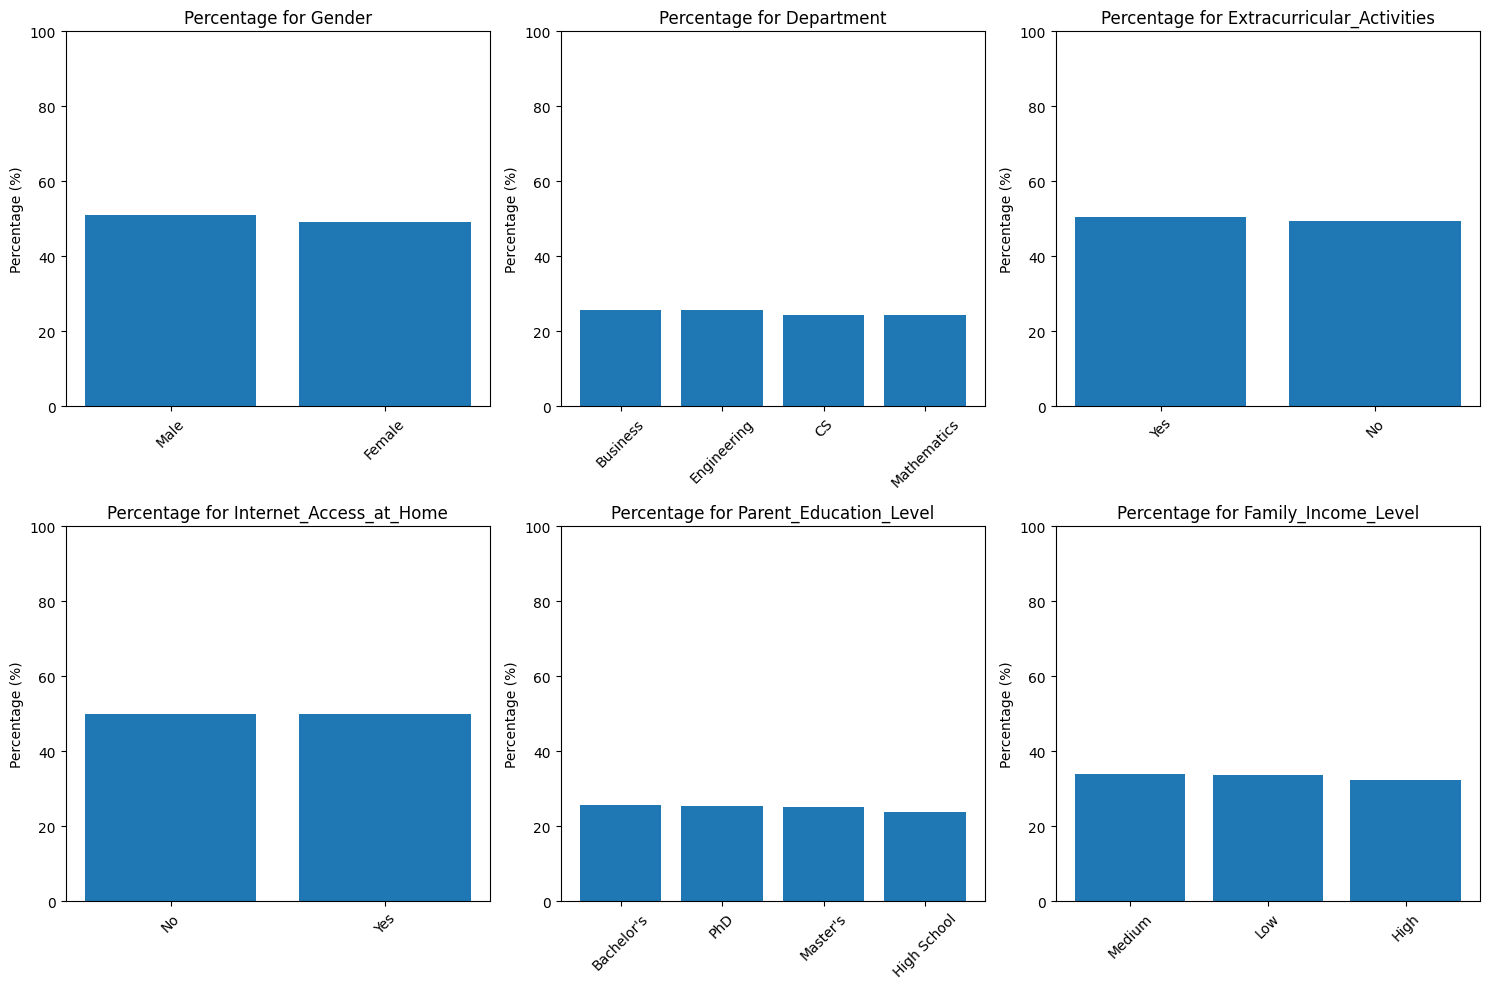

In [ ]:
# categorical percentage bar
n_cols = 3
n_rows = (len(categorical_cols) + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5 * n_rows))
axes = axes.flatten()

for i, col in enumerate(categorical_cols):
    counts = df_desc[col].value_counts(dropna=False)
    percentage = counts / counts.sum() * 100

    axes[i].bar(percentage.index.astype(str), percentage.values)
    axes[i].set_title(f'Percentage for {col}')
    axes[i].set_ylabel('Percentage (%)')
    axes[i].set_ylim(0, 100)
    axes[i].tick_params(axis='x', rotation=45)

for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

**5. Based on your boxplots in Q4, do any of your variables appear to have outliers? If yes, which ones? (2 points)**

Based on the boxplots, we didn't see any outliers.

**6. Write a program to show exactly what percentage of data are outliers (outliers are defined as variable 1.5 standard deviations above and below the IQR) (4 points)**

In [ ]:
# Total number of rows
total_rows = df.shape[0]

# Create a dictionary to store percentages
outlier_percentages = {}

# Loop through each numeric column
for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Count number of outliers
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    percentage = len(outliers) / total_rows * 100
    outlier_percentages[col] = round(percentage, 2)

# Convert result to DataFrame for display
outlier_df = pd.DataFrame(list(outlier_percentages.items()), columns=['Variable', 'Outlier_Percentage (%)'])
print(outlier_df)

                Variable  Outlier_Percentage (%)
0                    Age                     0.0
1         Attendance (%)                     0.0
2            Total_Score                     0.0
3   Study_Hours_per_Week                     0.0
4    Stress_Level (1-10)                     0.0
5  Sleep_Hours_per_Night                     0.0


**7. Based on the program you wrote in Q6, which variables have a large percentage of outliers? (2 points)**

There is no variable has a large percentage of outliners.

**8. Visualize the distributions of all of your variables (i.e., display histograms) (2 points)**

<ipython-input-10-276be99b3045>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(v,ax=axs[index])
<ipython-input-10-276be99b3045>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(v,ax=axs[index])
<ipython-input-10-276be99b3045>:5: UserWarning: 

`distplot` is a deprecated function and will be re

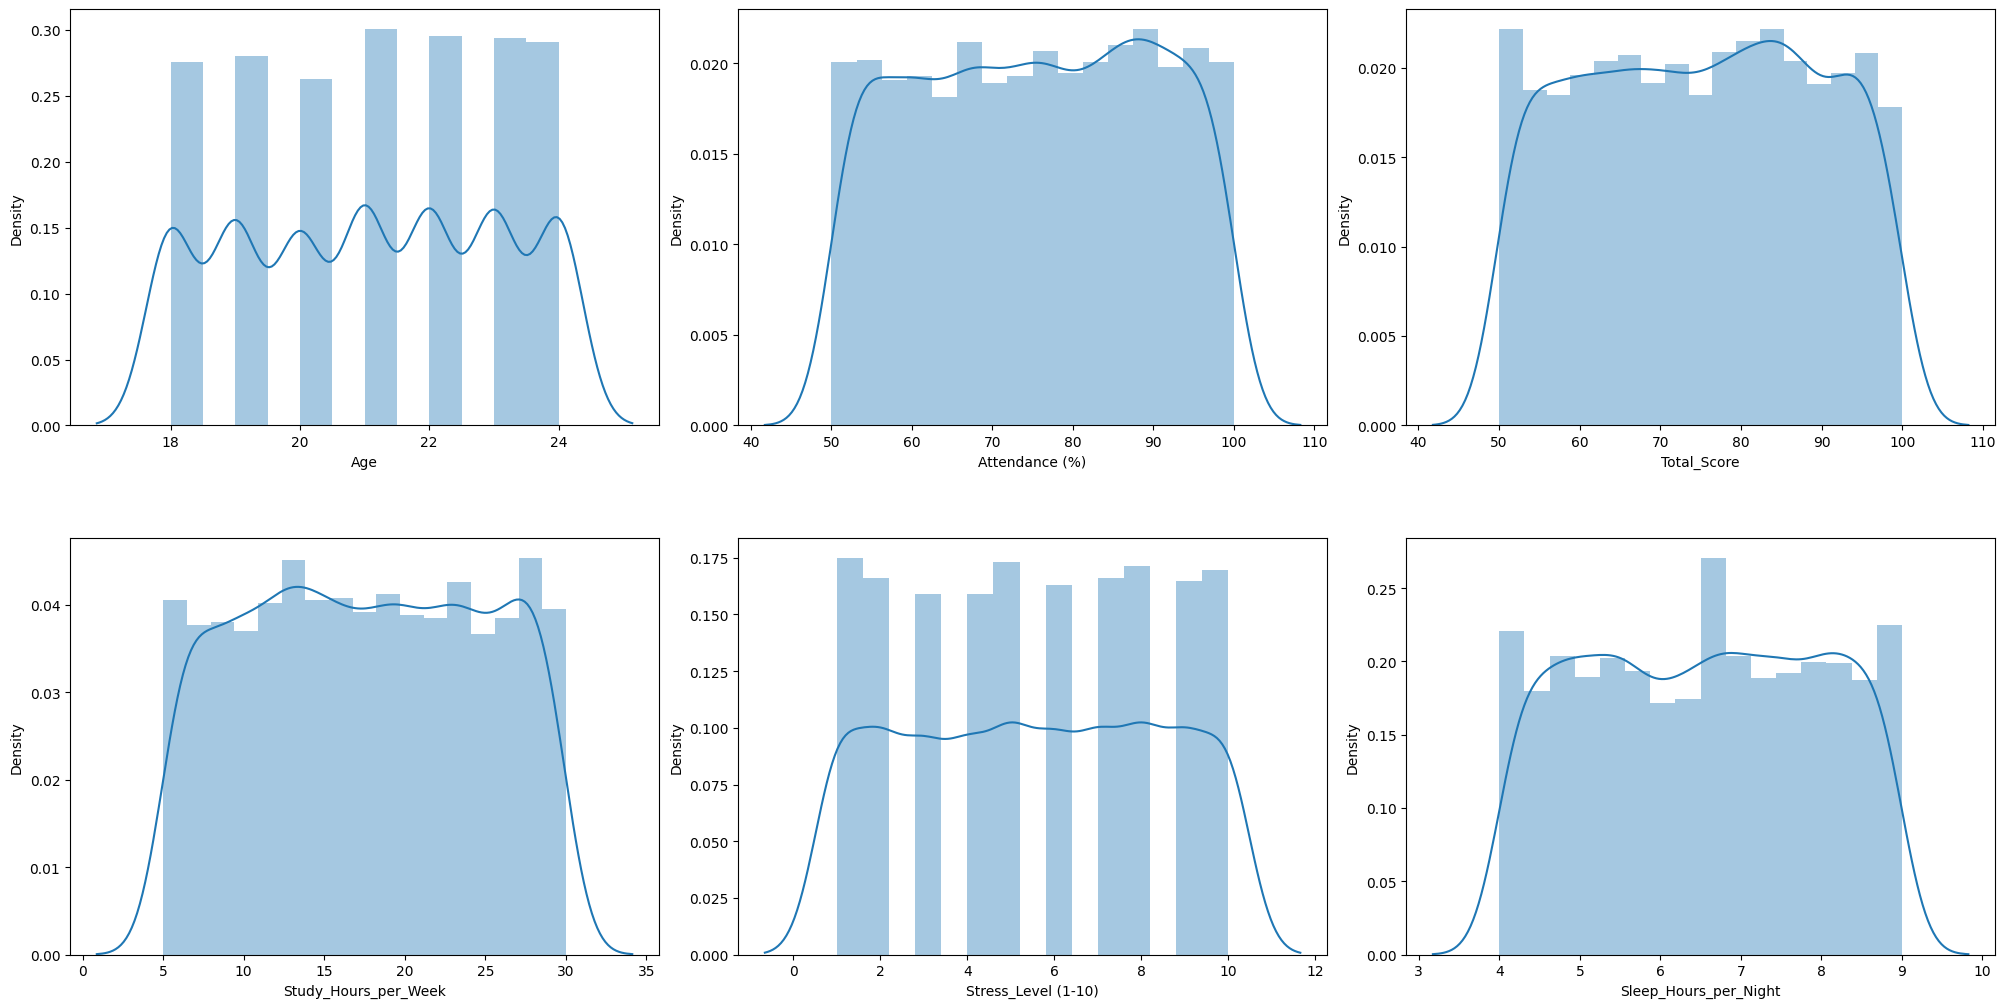

In [ ]:
fig,axs=plt.subplots(ncols=3,nrows=2, figsize=(20,10))
index=0
axs=axs.flatten()
for k,v in df_desc[numeric_cols].items():
    sns.distplot(v,ax=axs[index])
    index+=1
plt.tight_layout(pad=.4, w_pad=.5, h_pad=5.0)

**9. What do you notice about the scale for your features? (2 points)**

From the histograms above, we can clearly observe that the features are on very different scales:
*   Some features such as Age, Stress_Level (1–10), and Study_Hours_per_Weekare on relatively small ranges (e.g., 0–30).
*   In contrast, variables like Final_Score, Assignments_Avg, and Total_Score range from 0 to 100.
*   Others like Sleep_Hours_per_Night fall in between, typically ranging from 4 to 9.
*   There are even binary or categorical variables (e.g., Gender, Department) that are one-hot encoded, with only values 0 and 1.

This wide variation in scales means that some features could dominate others in machine learning models that are sensitive to magnitude, such as k-nearest neighbors, logistic regression, or SVMs. Therefore, standardizing the features is necessary to bring them onto a common scale, ensuring that no single feature disproportionately influences the model due to its scale.

**10. Standardize your features only and display distributions for all variables (features + Label)? (2 points)**

**moving forward, you only use the standardized version of your features for all subsequent analysis**

In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn import preprocessing
min_max_scaler=preprocessing.MinMaxScaler()

# Exclude label columns
df_features = df_desc.drop(columns=['Total_Score'])

numeric_features_cols = df_features.select_dtypes(include='number').columns
categorical_features_cols = df_features.select_dtypes(exclude='number').columns

# Standardize numeric variables
df_numeric_scaled = pd.DataFrame(
    min_max_scaler.fit_transform(df[numeric_features_cols]),
    columns=numeric_features_cols
)

# One-hot encode categorical variables
encoder = OneHotEncoder(sparse_output=False, drop='first')
df_categorical_encoded = pd.DataFrame(
    encoder.fit_transform(df[categorical_features_cols]),
    columns=encoder.get_feature_names_out(categorical_features_cols)
)

df_scaled1 = pd.concat([df_numeric_scaled, df_categorical_encoded], axis=1)

# Add label back for plotting
df_scaled1['Total_Score'] = df_desc['Total_Score']
print(df_scaled1.head())

        Age  Attendance (%)  Study_Hours_per_Week  Stress_Level (1-10)  \
0  0.666667        0.947179                 0.212             0.000000   
1  0.000000        0.954182                 0.884             0.333333   
2  1.000000        0.990396                 0.296             0.888889   
3  1.000000        0.807523                 0.820             0.777778   
4  0.833333        0.187875                 0.332             0.555556   

   Sleep_Hours_per_Night  Gender_Male  Department_CS  Department_Engineering  \
0                   0.38          0.0            0.0                     0.0   
1                   0.06          1.0            0.0                     0.0   
2                   0.42          1.0            0.0                     1.0   
3                   0.18          0.0            0.0                     1.0   
4                   0.10          0.0            1.0                     0.0   

   Department_Mathematics  Extracurricular_Activities_Yes  \
0            

In [ ]:
# turn total_score into binary
df_scaled1['Total_Score_Binary'] = (df_scaled1['Total_Score'] >= df_scaled1['Total_Score'].median()).astype(int)
df_scaled1['Total_Score_Binary'].describe()

,Total_Score_Binary
count,3975.000000
mean,0.398491
std,0.489649
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


In [ ]:
df_scaled = df_scaled1.drop(columns=['Total_Score'])

**11. Visualize the distributions of all of your standardized variables (i.e., display histograms) (2 points)**

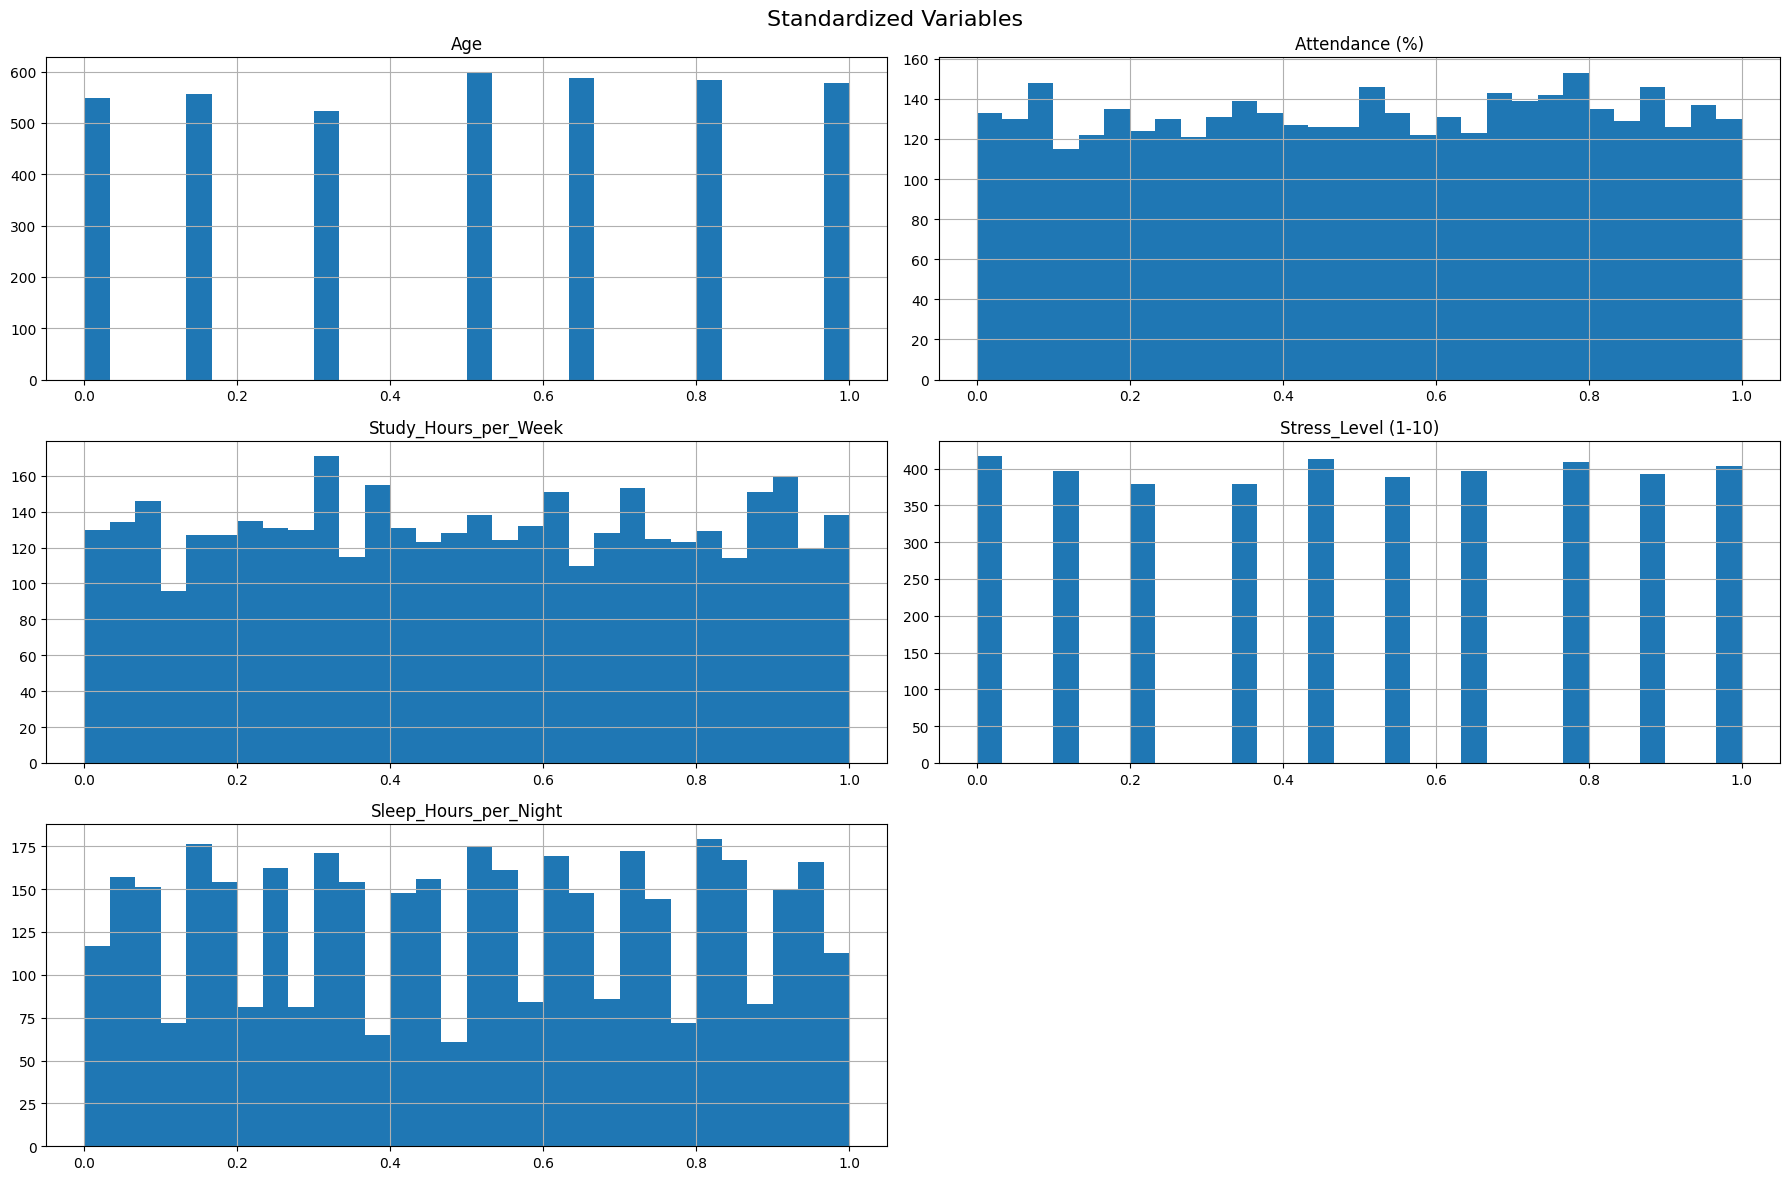

In [ ]:
# Plot histograms of numeric variables
df_numeric_scaled.hist(bins=30, figsize=(18, 12))
plt.suptitle("Standardized Variables", fontsize=16)
plt.tight_layout()
plt.show()

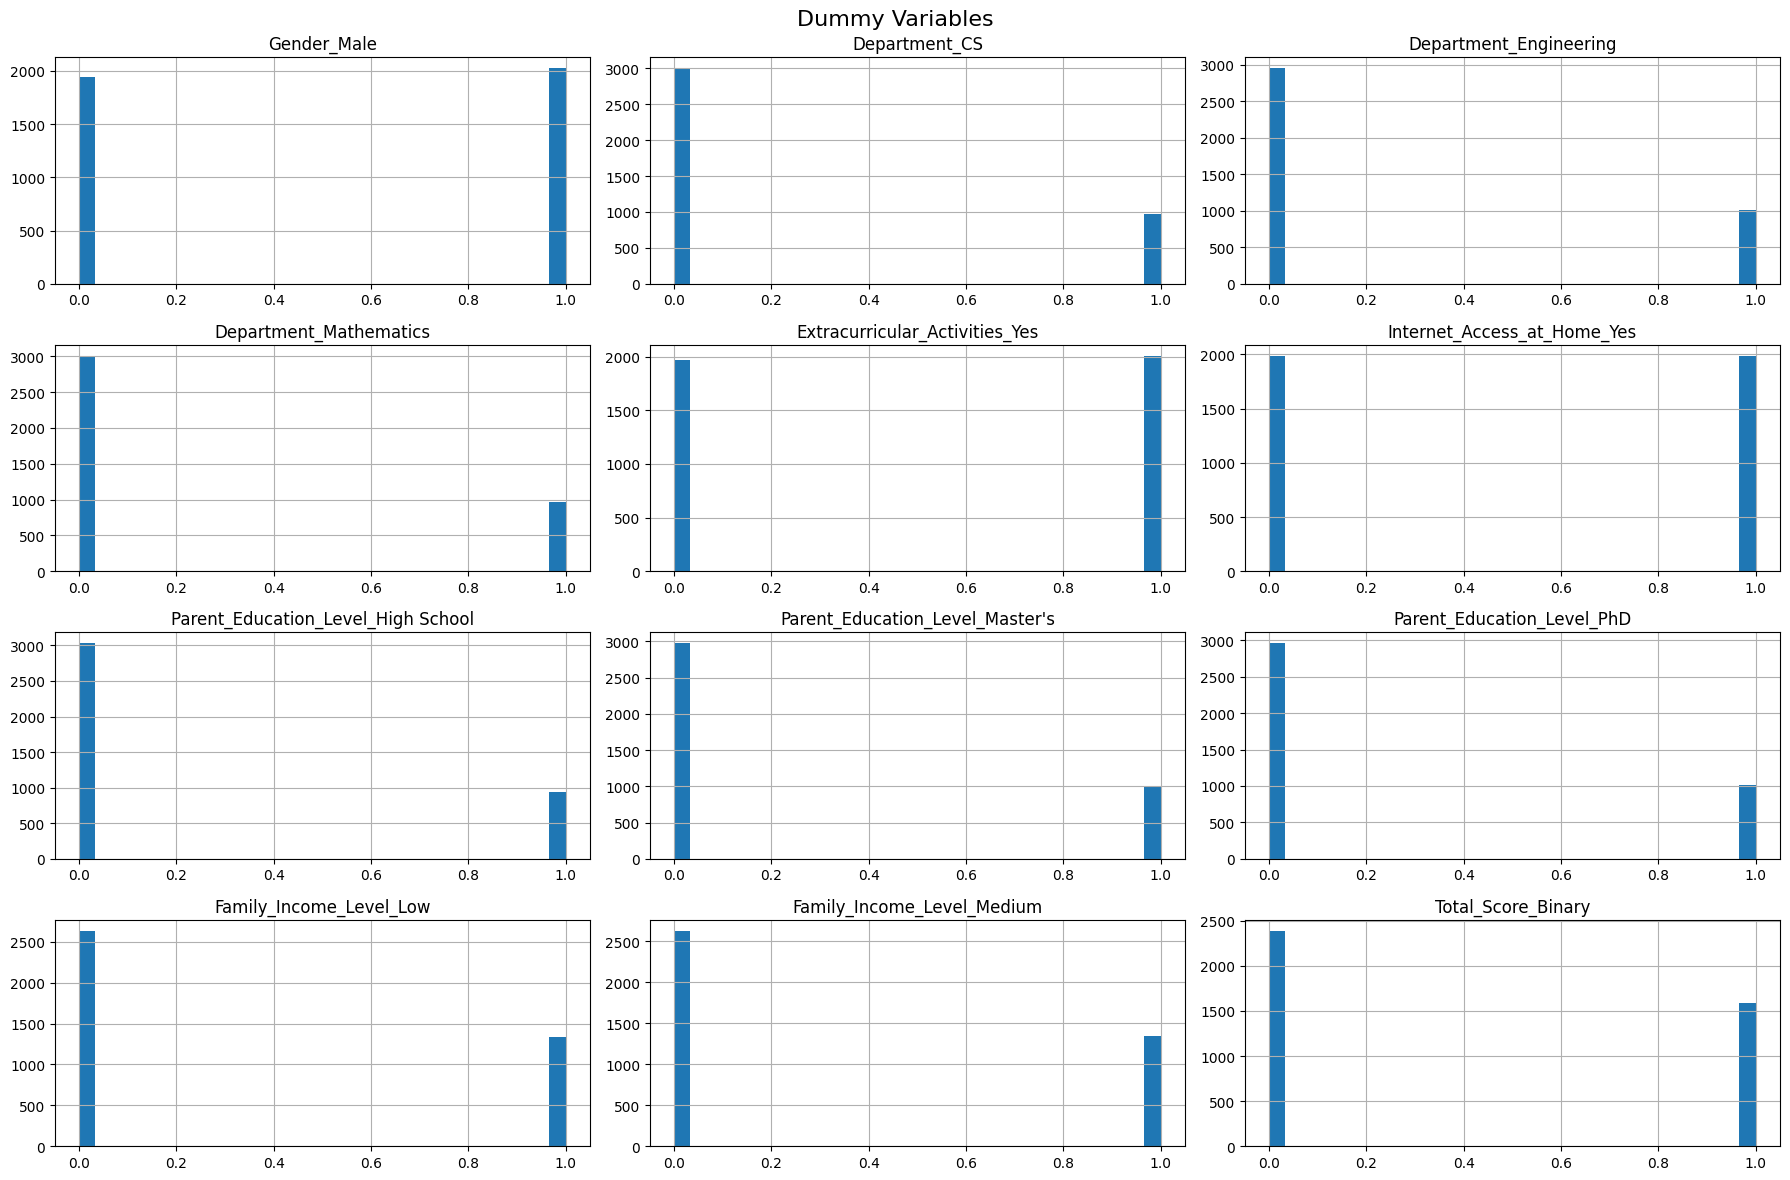

In [ ]:
# Plot histograms of dummy variables
df_categorical_encoded["Total_Score_Binary"]=df_scaled1["Total_Score_Binary"]
df_categorical_encoded.hist(bins=30, figsize=(18, 12))
plt.suptitle("Dummy Variables", fontsize=16)
plt.tight_layout()
plt.show()

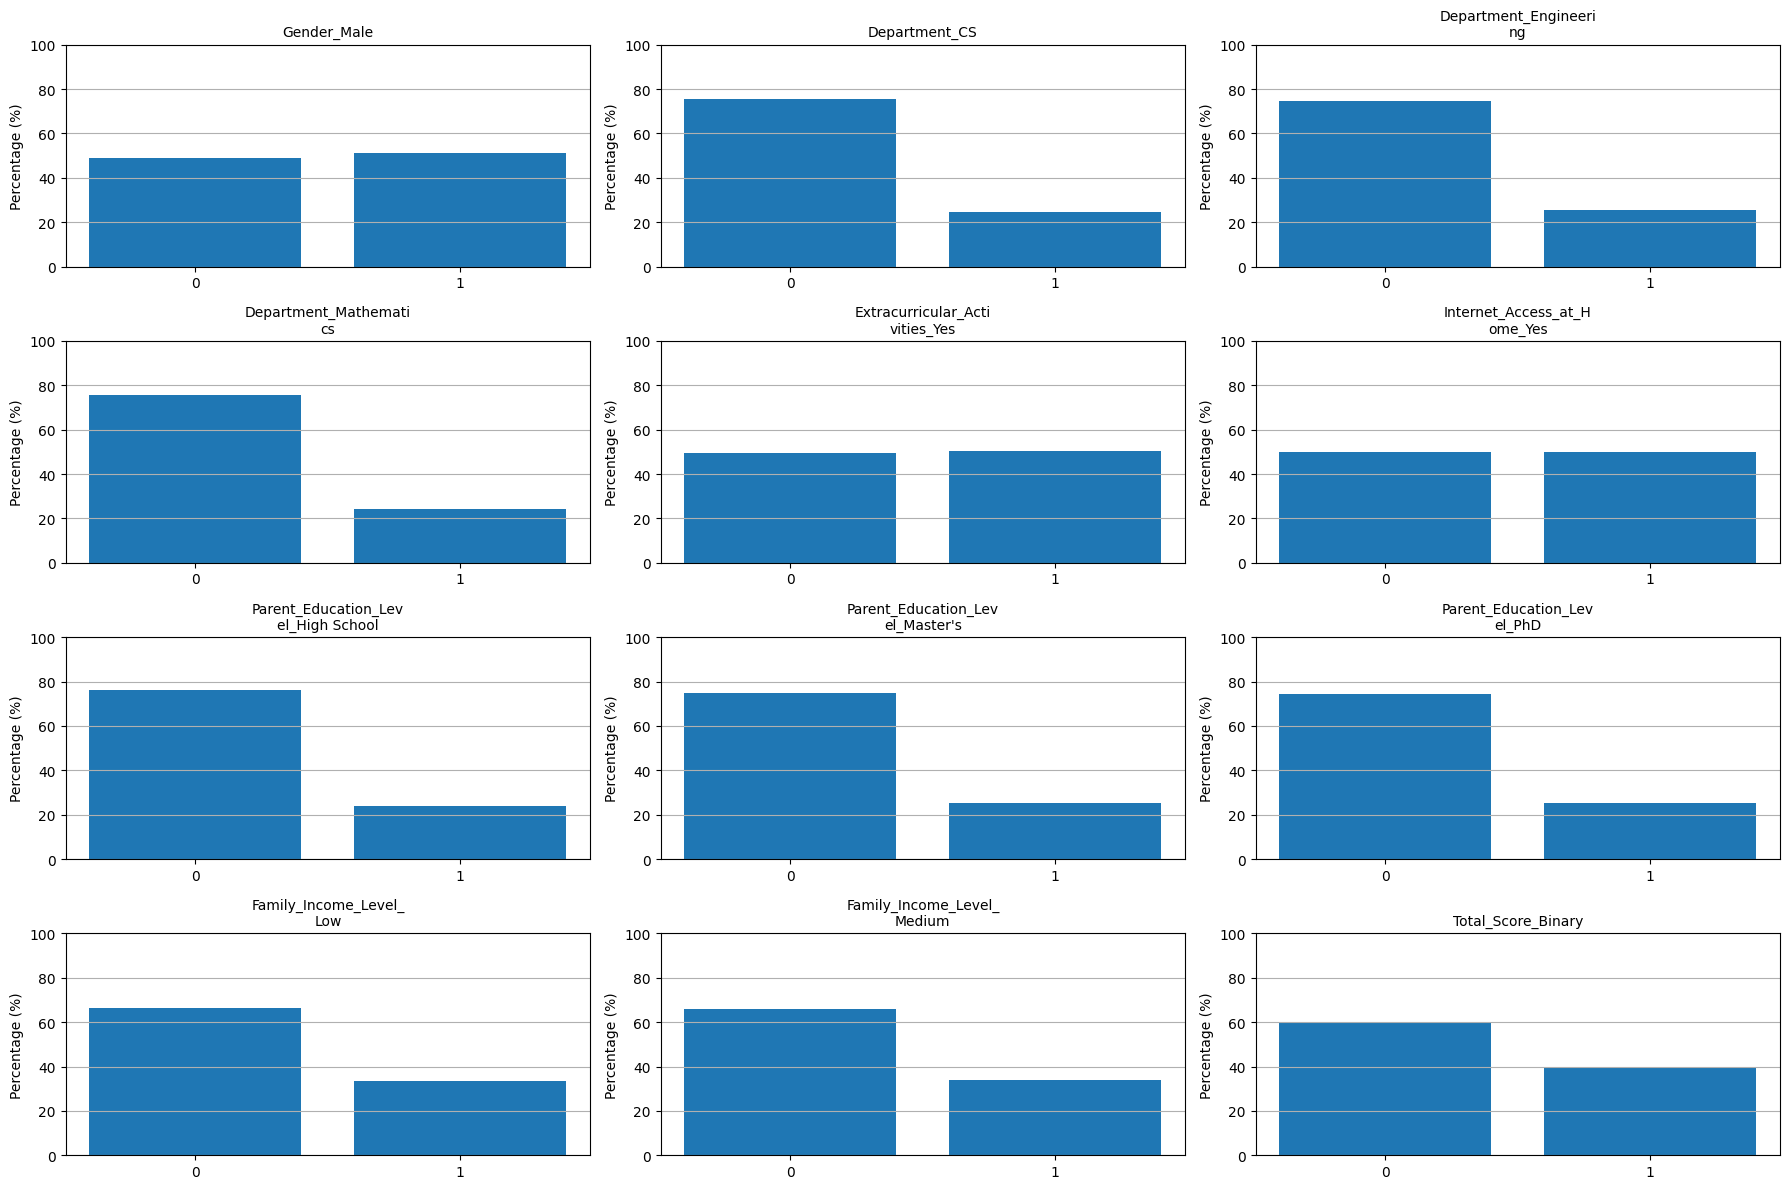

In [ ]:
# percentage bar
import textwrap
fig,axes=plt.subplots(ncols=3,nrows=4, figsize=(18,12))
index=0
axes=axes.flatten()
for i, col in enumerate(df_categorical_encoded.columns):
    percent_1 = df_categorical_encoded[col].mean() * 100
    percent_0 = 100 - percent_1
    axes[i].bar(["0", "1"], [percent_0, percent_1])
    wrapped_title = "\n".join(textwrap.wrap(col, width=20))
    axes[i].set_title(wrapped_title, fontsize=10)
    axes[i].set_ylabel("Percentage (%)")
    axes[i].grid(axis='y')
    axes[i].set_ylim(0, 100)
plt.tight_layout()

**12. Which variables appear to be normally distributed? Which are left- vs. right-skewed? Which variables have a bimodal distribution? (4 points)**

None of the variables are convincingly normally distributed despite stadardization. For the continuous varibles their histograms are relatively flat with many small spikes. Study hours per week (Study_Hours_per_Week) and sleep hours per night (Sleep_Hours_per_Night) are approximately symmetric, but not bell-shaped.  Class attendance rate (Attendance (%))  is mildly left-skewed with more higher values. None of the variables has a bimodal distribution.

**13. Display a correlation matrix for all of your variables (both labels and features) (2 points)**

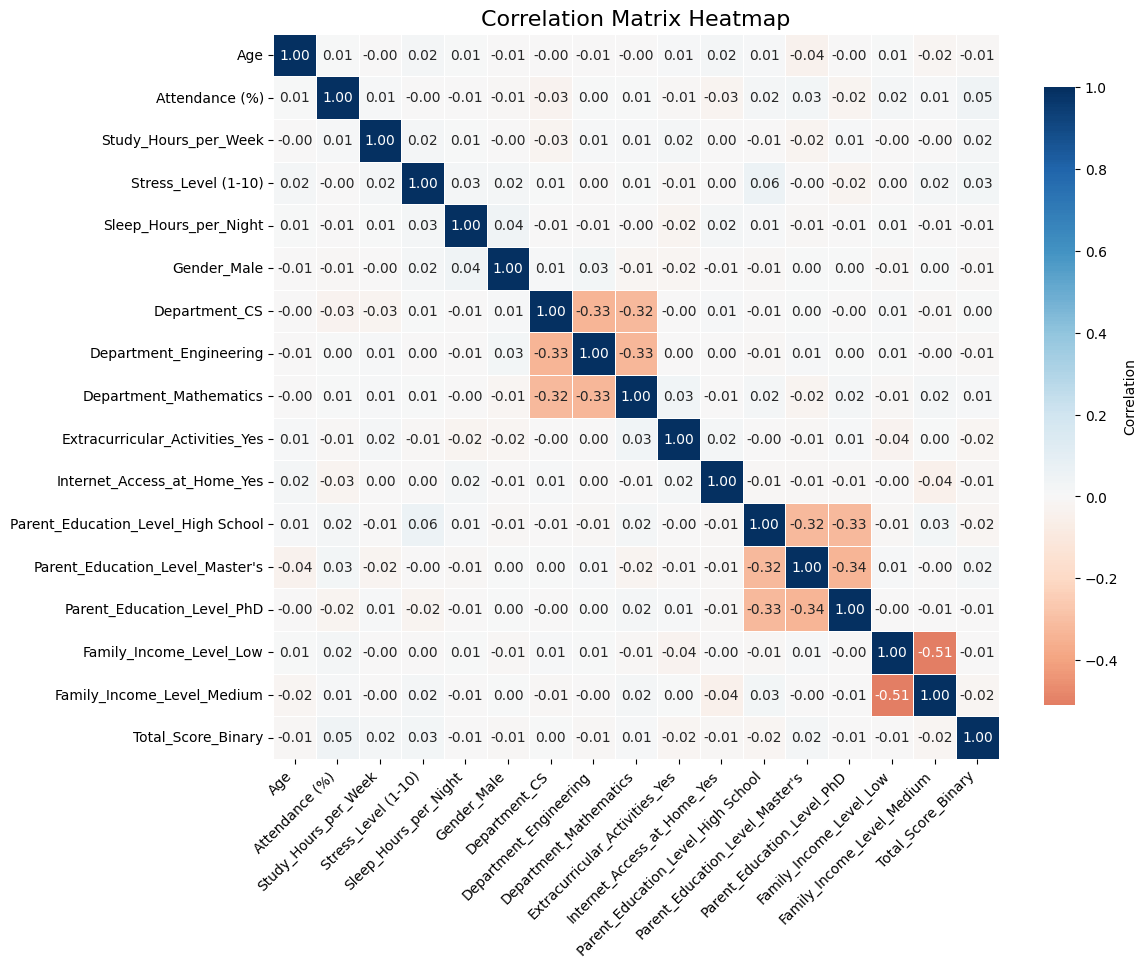

In [ ]:
corr_matrix = df_scaled.corr()

plt.figure(figsize=(12, 10))

# Draw the heatmap with a diverging colormap and annotations
sns.heatmap(
    corr_matrix,
    cmap='RdBu',         # Gradient color palette
    center=0,
    annot=True,              # Show correlation coefficients
    fmt=".2f",               # Format decimal places
    square=True,
    linewidths=0.5,
    cbar_kws={"shrink": 0.8, "label": "Correlation"}
)

plt.title("Correlation Matrix Heatmap", fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

**14. Which features are most correlated with your label (0.5 or greater)? (2 points)**

None of the features.

**15. Which features are most correlated with each other (0.5 or greater)? (2 points)**

Low level of family income (Family_Income_Level_Low) and medium level of family income (Family_Income_Level_Medium) have negative coerrelation of -0.51. This is natural given how the dummy variables are constructed. Low, Medium, and implied High are mutually exclusive, there’s built-in negative association between Low and Medium. If the family is not medium income then there's a decent chance that they are low income.

**16. What does feature correlation raise concerns of? What is one (unsupervised learning) method that will ensure no features are correlated? (2 points)**

Feature correlation raises concerns of multicollinearity, which can make it difficult to determine the individual contribution of each feature and lead to model instability or overfitting. From the correlation matrix above, we can see several dummy variables such as parent education levels and income levels are negatively correlated with each other, due to the nature of one-hot encoding. An unsupervised learning method that addresses this issue is Principal Component Analysis, which transforms correlated features into a new set of uncorrelated principal components.

**17. Visualize a scatterplot of your features and labels. One plot per feature. X-axis should display the feature. y-axis the label? (2 points)**

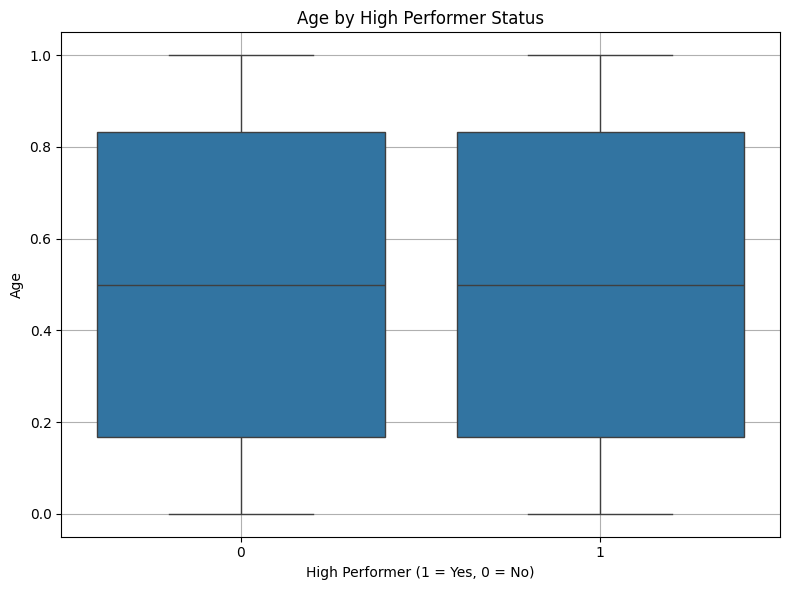

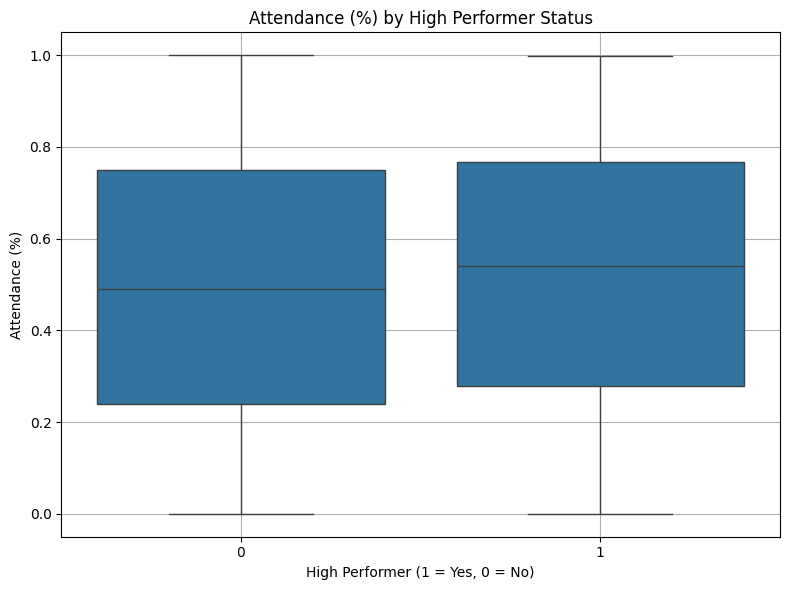

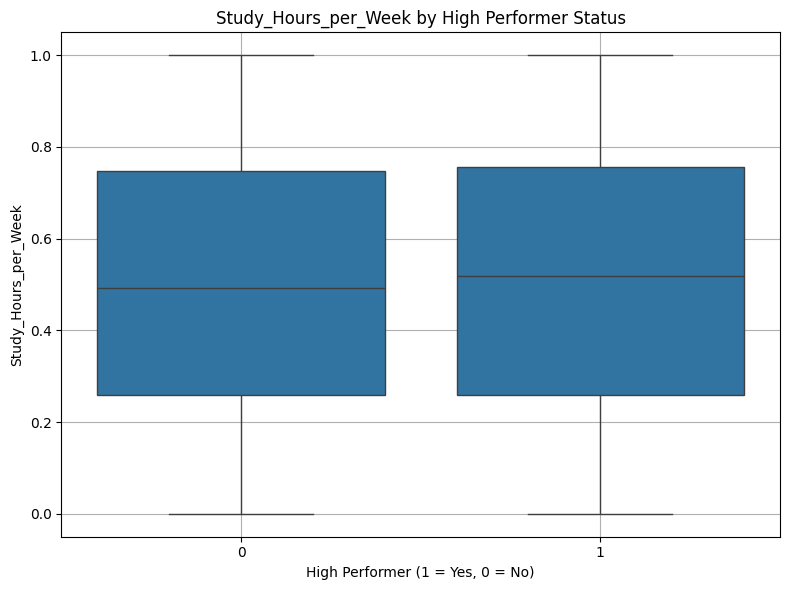

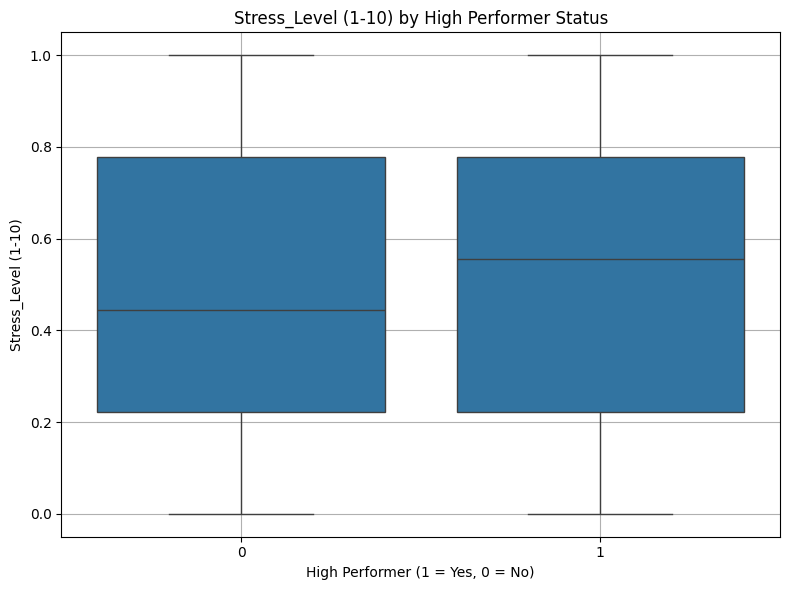

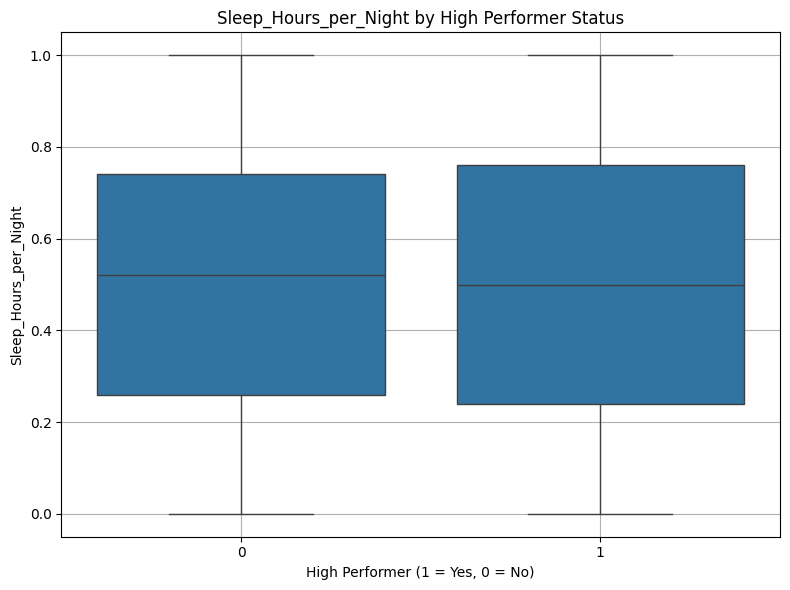

<Figure size 800x600 with 0 Axes>

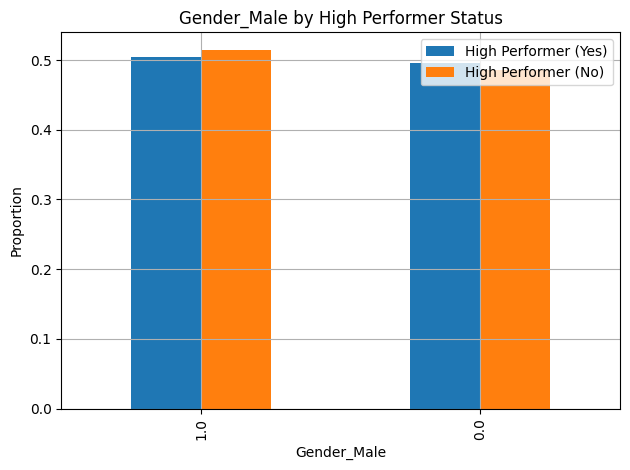

<Figure size 800x600 with 0 Axes>

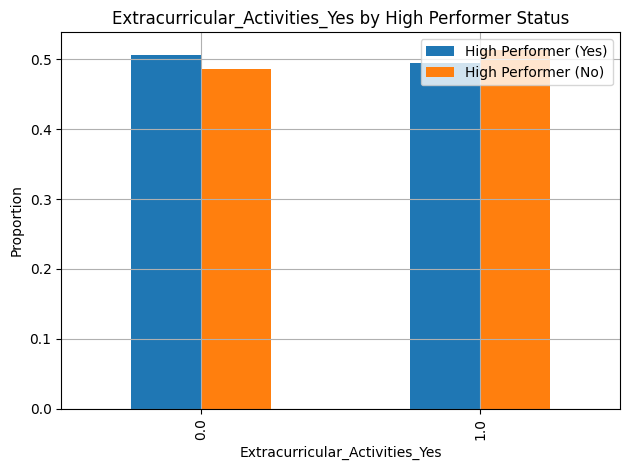

<Figure size 800x600 with 0 Axes>

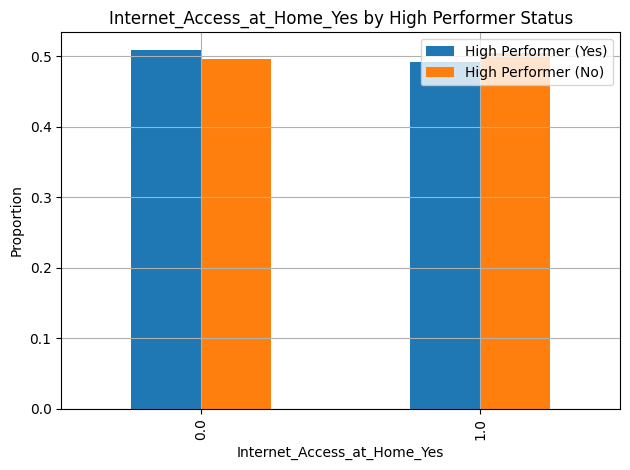

<Figure size 800x600 with 0 Axes>

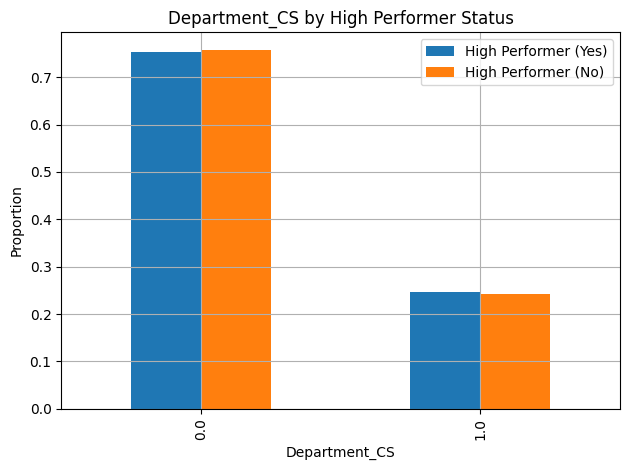

<Figure size 800x600 with 0 Axes>

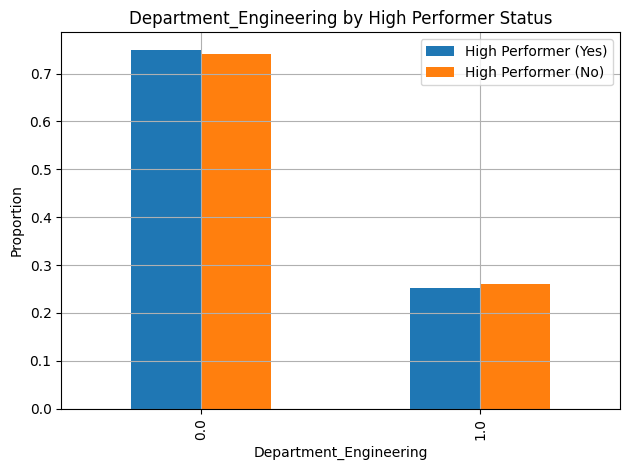

<Figure size 800x600 with 0 Axes>

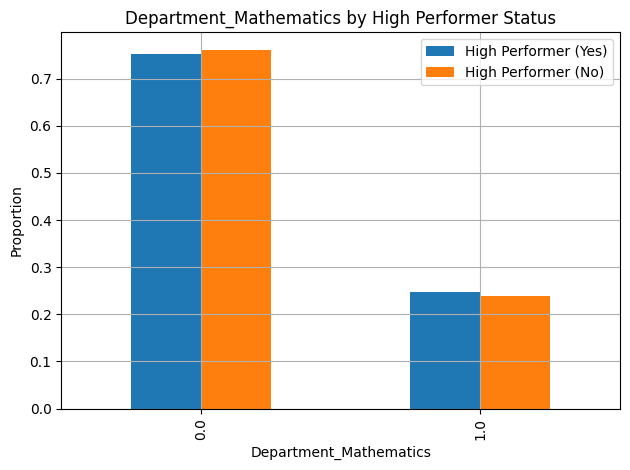

<Figure size 800x600 with 0 Axes>

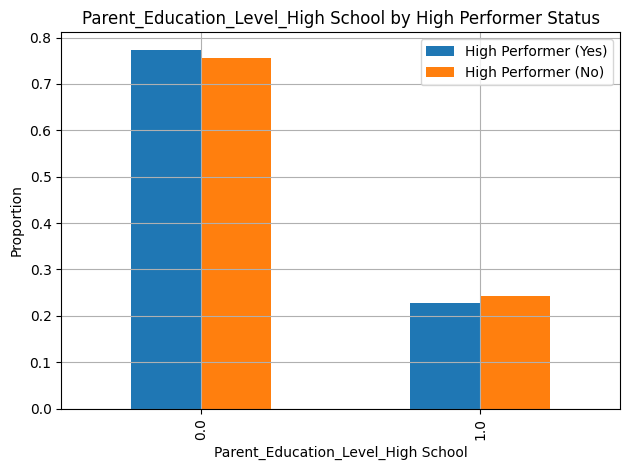

<Figure size 800x600 with 0 Axes>

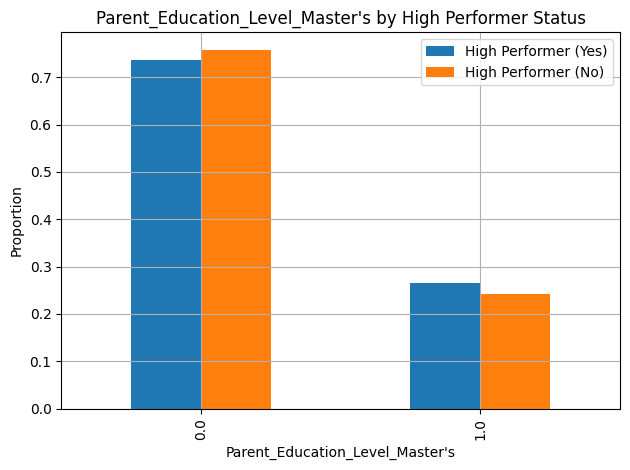

<Figure size 800x600 with 0 Axes>

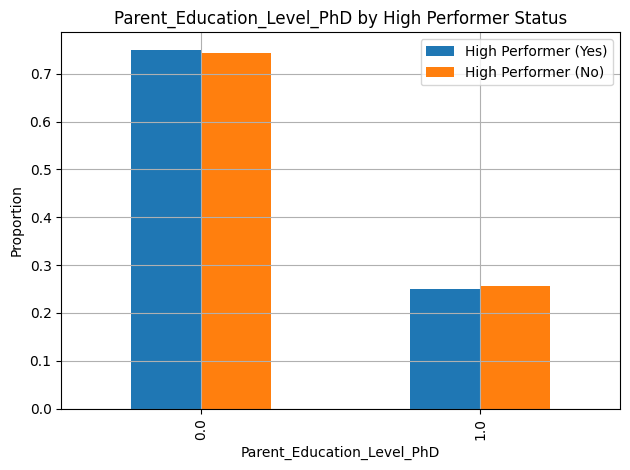

<Figure size 800x600 with 0 Axes>

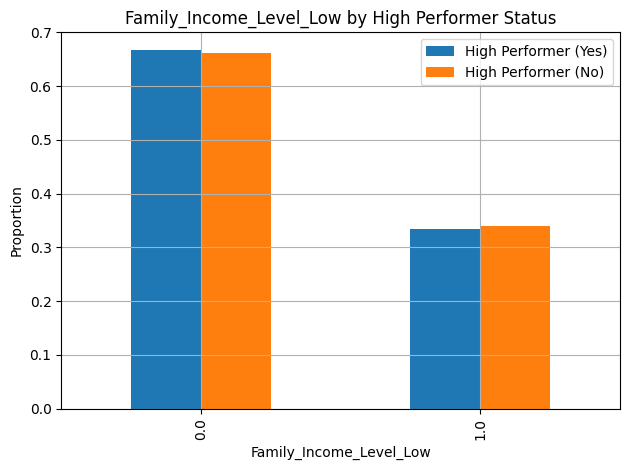

<Figure size 800x600 with 0 Axes>

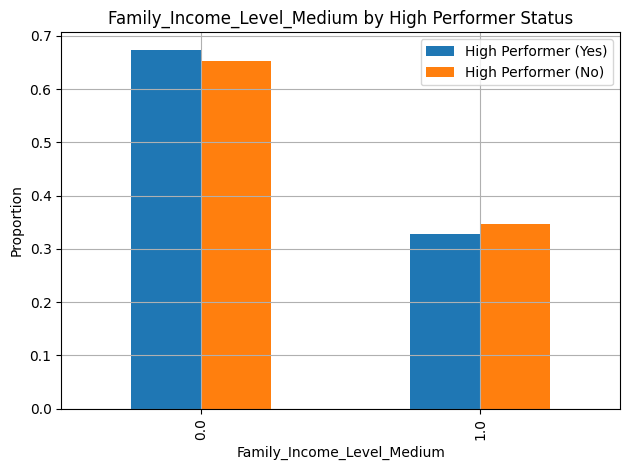

In [ ]:
import numpy as np
# define continuous and categorical features
continuous_features = [
    'Age',
    'Attendance (%)',
    'Study_Hours_per_Week',
    'Stress_Level (1-10)',
    'Sleep_Hours_per_Night'
]

categorical_features = [
    'Gender_Male',
    'Extracurricular_Activities_Yes',
    'Internet_Access_at_Home_Yes',
    'Department_CS',
    'Department_Engineering',
    'Department_Mathematics',
    'Parent_Education_Level_High School',
    'Parent_Education_Level_Master\'s',
    'Parent_Education_Level_PhD',
    'Family_Income_Level_Low',
    'Family_Income_Level_Medium'
]

# Plot side-by-side boxplots for continuous features
for feature in continuous_features:
    plt.figure(figsize=(8,6))
    sns.boxplot(x='Total_Score_Binary', y=feature, data=df_scaled)
    plt.title(f'{feature} by High Performer Status')
    plt.xlabel('High Performer (1 = Yes, 0 = No)')
    plt.ylabel(feature)
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Plot side-by-side bar graphs for categorical features
for feature in categorical_features:
    plt.figure(figsize=(8,6))

    # Calculate the proportion of each category within each performance group
    data_yes = df_scaled[df_scaled['Total_Score_Binary'] == 1][feature].value_counts(normalize=True)
    data_no = df_scaled[df_scaled['Total_Score_Binary'] == 0][feature].value_counts(normalize=True)

    # Combine the two groups into a single DataFrame for comparison
    df_plot = pd.DataFrame({'High Performer (Yes)': data_yes, 'High Performer (No)': data_no}).fillna(0)

    # Plot the bar graph
    df_plot.plot(kind='bar')
    plt.title(f'{feature} by High Performer Status')
    plt.xlabel(feature)
    plt.ylabel('Proportion')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

**18. Based on your exploratory analysis, if you had to select a subset of features, which features would you select going forward? Please provide a justification. (4 points)**

We would select Stress Level (1–10), Study Hours per Week, and Sleep Hours per Night as key features. These continuous variables showed clearer separation between high and low performers.
In contrast, most categorical features, such as gender, department, and family income level, did not show strong or consistent patterns. Focusing on features with stronger visual differences is likely to improve prediction accuracy.




# Part 3: Supervised learning (45 points)
HINT: Adapt prior code! Assignment 5 will be very helpful. **USE THE STANDARDIZED VERSION OF YOUR FEATURES**

a) Compare Naïve Bayes, Logistic Regression, SVMs, Decision Trees, Random Forests, and Adaboost (6 total alogirthms).
*   Use the binary version of your label. Remember that you converted your continuous outcome to a binary variable above.
*   Use all your features in the model (do not use the subset)
*   You are likely wondering when you learned Adaboost. You watched a video on it. It is a boosting method. However, you did not learn how to apply it in Python. Still, I want to see that you can continue to build on your machine learning knowledge outside of the classroom. This is your opportunity to do so. You have all the pre-requisite knowledge.

b) For each model above, I want you to perform the following optimizations:
Part 2. Subset of features included in the model.

*   Hold one out (80/20 train/test split) (this is your baseline model)
*   Hold one out (90/10 train/test split)
*   5-fold cross-validation (80/20 train/test split)
*   10-fold cross-validation (80/20 train/test split)
*   10-fold stratified cross-validation (80/20 train/test split)
*   10-fold cross-validation with subset of features identified above (80/20 train/test split)
*   Select **two** hyperparameter tunings for each of these models. For example, for Logistic Regresion, you might select the L1 and L2 regularization. For Bayes, you might use two other distributions. For SVM, this could be to evaluate different kernels including a polynomial kernel and a radial basis function kernel. For decision trees / random forest, you might have to tweak node / leaf sizes. You will have to look into hyperaparemter tunings for Adaboost and that is ok! **Use 10-fold cross-validation (80/20 train/test split) with ALL features.**

In [ ]:
#insert code and comment *appropriately* (15 points)

In [ ]:
df_scaled.describe()

,Age,Attendance (%),Study_Hours_per_Week,Stress_Level (1-10),Sleep_Hours_per_Night,Gender_Male,Department_CS,Department_Engineering,Department_Mathematics,Extracurricular_Activities_Yes,Internet_Access_at_Home_Yes,Parent_Education_Level_High School,Parent_Education_Level_Master's,Parent_Education_Level_PhD,Family_Income_Level_Low,Family_Income_Level_Medium,Total_Score_Binary
count,3975.000000,3975.000000,3975.000000,3975.000000,3975.000000,3975.000000,3975.000000,3975.000000,3975.000000,3975.000000,3975.000000,3975.000000,3975.000000,3975.000000,3975.000000,3975.000000,3975.000000
mean,0.508721,0.505440,0.502772,0.500545,0.502249,0.509937,0.244277,0.256101,0.243019,0.505660,0.499623,0.237233,0.251572,0.254591,0.336855,0.338868,0.398491
std,0.332295,0.289295,0.288208,0.320958,0.288482,0.499964,0.429712,0.436533,0.428960,0.500031,0.500063,0.425440,0.433971,0.435686,0.472694,0.473384,0.489649
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.166667,0.252901,0.260000,0.222222,0.260000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.500000,0.511204,0.500000,0.555556,0.500000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.833333,0.758503,0.752000,0.777778,0.760000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
# generate the features
x=df_scaled.drop(columns=['Total_Score_Binary'])
y=df_scaled['Total_Score_Binary']

In [ ]:
# create null list to store the accuracy and kappa values
accuracy_lr = []
kappa_lr = []
accuracy_SVM = []
kappa_SVM = []

accuracy_dt = []
kappa_dt = []
accuracy_rf = []
kappa_rf = []

accuracy_nb = []
kappa_nb = []
accuracy_ada = []
kappa_ada = []

1. Hold one out (80/20 train/test split)

In [ ]:
# split the datasets
x_train1, x_test1, y_train1, y_test1 = train_test_split(x, y, test_size=0.2, random_state=123)

# perform logistic regression
log_reg1 = LogisticRegression(random_state=123)
log_reg1.fit(x_train1, y_train1)
# make prediction
y_pred_lr1 = log_reg1.predict(x_test1)
# accuracy
accuracy_lr1 = accuracy_score(y_test1, y_pred_lr1)
kappa_lr1 = cohen_kappa_score(y_test1, y_pred_lr1)
accuracy_lr.append(accuracy_lr1)
kappa_lr.append(kappa_lr1)

# perform SVM
C = 1.0
svm1 = SVC(kernel="linear", C=C)
svm1.fit(x_train1, y_train1)
# make prediction
y_pred_svm1 = svm1.predict(x_test1)
# accuracy
accuracy_svm1 = accuracy_score(y_test1, y_pred_svm1)
kappa_svm1 = cohen_kappa_score(y_test1, y_pred_svm1)
accuracy_SVM.append(accuracy_svm1)
kappa_SVM.append(kappa_svm1)

# perform decision trees
dt1 = DecisionTreeClassifier(random_state=123)
dt1.fit(x_train1, y_train1)
y_pred_dt1 = dt1.predict(x_test1)
accuracy_dt.append(accuracy_score(y_test1, y_pred_dt1))
kappa_dt.append(cohen_kappa_score(y_test1, y_pred_dt1))

# perform random forests
rf1 = RandomForestClassifier(random_state=123)
rf1.fit(x_train1, y_train1)
y_pred_rf1 = rf1.predict(x_test1)
accuracy_rf.append(accuracy_score(y_test1, y_pred_rf1))
kappa_rf.append(cohen_kappa_score(y_test1, y_pred_rf1))

# perform Naive Bayes
nb1 = GaussianNB()
nb1.fit(x_train1, y_train1)
y_pred_nb1 = nb1.predict(x_test1)
accuracy_nb.append(accuracy_score(y_test1, y_pred_nb1))
kappa_nb.append(cohen_kappa_score(y_test1, y_pred_nb1))

# perform AdaBoost
ada1 = AdaBoostClassifier(random_state=123)
ada1.fit(x_train1, y_train1)
y_pred_ada1 = ada1.predict(x_test1)
accuracy_ada.append(accuracy_score(y_test1, y_pred_ada1))
kappa_ada.append(cohen_kappa_score(y_test1, y_pred_ada1))

print(accuracy_lr)
print(kappa_lr)
print(accuracy_SVM)
print(kappa_SVM)
print(accuracy_dt)
print(kappa_dt)
print(accuracy_rf)
print(accuracy_nb)
print(kappa_nb)
print(accuracy_ada)
print(kappa_ada)

[0.5786163522012578]
[np.float64(-0.006994990074676188)]
[0.5836477987421383]
[np.float64(0.0)]
[0.48930817610062893]
[np.float64(-0.0480702415201677)]
[0.5509433962264151]
[0.5849056603773585]
[np.float64(0.020351008215085953)]
[0.5849056603773585]
[np.float64(0.007535692398483729)]


2. Hold one out (90/10 train/test split)

In [ ]:
x_train2, x_test2, y_train2, y_test2 = train_test_split(x, y, test_size=0.1, random_state=123)

# perform logistic regression
log_reg2 = LogisticRegression()
log_reg2.fit(x_train2, y_train2)
# make prediction
y_pred_lr2 = log_reg2.predict(x_test2)
# accuracy
accuracy_lr2 = accuracy_score(y_test2, y_pred_lr2)
kappa_lr2 = cohen_kappa_score(y_test2, y_pred_lr2)
accuracy_lr.append(accuracy_lr2)
kappa_lr.append(kappa_lr2)

# perform SVM
C = 1.0
svm2 = SVC(kernel="linear", C=C)
svm2.fit(x_train2, y_train2)
# make prediction
y_pred_svm2 = svm2.predict(x_test2)
# accuracy
accuracy_svm2 = accuracy_score(y_test2, y_pred_svm2)
kappa_svm2 = cohen_kappa_score(y_test2, y_pred_svm2)
accuracy_SVM.append(accuracy_svm2)
kappa_SVM.append(kappa_svm2)

# perform decision trees
dt2 = DecisionTreeClassifier(random_state=123)
dt2.fit(x_train2, y_train2)
# make prediction
y_pred_dt2 = dt2.predict(x_test2)
# accuracy
accuracy_dt.append(accuracy_score(y_test2, y_pred_dt2))
kappa_dt.append(cohen_kappa_score(y_test2, y_pred_dt2))

# perform random forests
rf2 = RandomForestClassifier(random_state=123)
rf2.fit(x_train2, y_train2)
# make prediction
y_pred_rf2 = rf2.predict(x_test2)
# accuracy
accuracy_rf.append(accuracy_score(y_test2, y_pred_rf2))
kappa_rf.append(cohen_kappa_score(y_test2, y_pred_rf2))

# perform naive bayes
nb2 = GaussianNB()
nb2.fit(x_train2, y_train2)
# make prediction
y_pred_nb2 = nb2.predict(x_test2)
# accuracy
accuracy_nb.append(accuracy_score(y_test2, y_pred_nb2))
kappa_nb.append(cohen_kappa_score(y_test2, y_pred_nb2))

# perform AdaBoost
ada2 = AdaBoostClassifier(random_state=123)
ada2.fit(x_train2, y_train2)
# make prediction
y_pred_ada2 = ada2.predict(x_test2)
# accuracy
accuracy_ada.append(accuracy_score(y_test2, y_pred_ada2))
kappa_ada.append(cohen_kappa_score(y_test2, y_pred_ada2))

print(accuracy_lr)
print(kappa_lr)
print(accuracy_SVM)
print(kappa_SVM)
print(accuracy_dt)
print(kappa_dt)
print(accuracy_rf)
print(kappa_rf)
print(accuracy_nb)
print(kappa_nb)
print(accuracy_ada)
print(kappa_ada)

[0.5786163522012578, 0.5703517587939698]
[np.float64(-0.006994990074676188), np.float64(-0.008236792983911556)]
[0.5836477987421383, 0.5753768844221105]
[np.float64(0.0), np.float64(0.0)]
[0.48930817610062893, 0.5025125628140703]
[np.float64(-0.0480702415201677), np.float64(-0.021279904616261947)]
[0.5509433962264151, 0.5452261306532663]
[np.float64(-0.024687970481303445), np.float64(-0.02879095141526955)]
[0.5849056603773585, 0.5753768844221105]
[np.float64(0.020351008215085953), np.float64(0.010591038804389385)]
[0.5849056603773585, 0.5753768844221105]
[np.float64(0.007535692398483729), np.float64(0.0)]


3. 5-fold cross-validation (80/20 train/test split)

In [ ]:
x_train3, x_test3, y_train3, y_test3 = train_test_split(x, y, test_size=0.2, random_state=123)
# Create KFOLD object
kf3 = KFold(n_splits=5, shuffle=True, random_state=1234)
lst_accu = []

# Perform logistic regression
log_reg3 = LogisticRegression()
# make prediction on the training dataset
for train_index, val_index in kf3.split(x_train3, y_train3):
    x_train_fold, x_val_fold = x_train3.iloc[train_index], x_train3.iloc[val_index]
    y_train_fold, y_val_fold = y_train3.iloc[train_index], y_train3.iloc[val_index]
    log_reg3.fit(x_train_fold, y_train_fold)
    lst_accu.append(log_reg3.score(x_val_fold, y_val_fold))
# Print the output.
print('Possible accuracy for logistic regression:', lst_accu)
print('\nMaximum Accuracy:',
	max(lst_accu)*100, '%')
print('\nMinimum Accuracy:',
	min(lst_accu)*100, '%')
print('\nOverall Accuracy:',
	mean(lst_accu)*100, '%')
print('\nStandard Deviation is:', stdev(lst_accu))
# Test the model
y_pred_lr3 = log_reg3.predict(x_test3)
# accuracy
accuracy_lr3 = accuracy_score(y_test3, y_pred_lr3)
kappa_lr3 = cohen_kappa_score(y_test3, y_pred_lr3)
accuracy_lr.append(accuracy_lr3)
kappa_lr.append(kappa_lr3)

# perform SVM
C = 1.0
svm3 = SVC(kernel="linear", C=C)
# make prediction on the training dataset
for train_index, val_index in kf3.split(x_train3, y_train3):
    x_train_fold, x_val_fold = x_train3.iloc[train_index], x_train3.iloc[val_index]
    y_train_fold, y_val_fold = y_train3.iloc[train_index], y_train3.iloc[val_index]
    svm3.fit(x_train_fold, y_train_fold)
    lst_accu.append(svm3.score(x_val_fold, y_val_fold))
# Print the output.
print('\nPossible accuracy for SVM:', lst_accu)
print('\nMaximum Accuracy:',
	max(lst_accu)*100, '%')
print('\nMinimum Accuracy:',
	min(lst_accu)*100, '%')
print('\nOverall Accuracy:',
	mean(lst_accu)*100, '%')
print('\nStandard Deviation is:', stdev(lst_accu))
# Test the model
y_pred_svm3 = svm3.predict(x_test3)
# accuracy
accuracy_svm3 = accuracy_score(y_test3, y_pred_svm3)
kappa_svm3 = cohen_kappa_score(y_test3, y_pred_svm3)
accuracy_SVM.append(accuracy_svm3)
kappa_SVM.append(kappa_svm3)

# Perform decision trees
lst_accu_dt = []
# make prediction on the training dataset
dt3 = DecisionTreeClassifier(random_state=123)
for train_index, val_index in kf3.split(x_train3, y_train3):
    x_train_fold, x_val_fold = x_train3.iloc[train_index], x_train3.iloc[val_index]
    y_train_fold, y_val_fold = y_train3.iloc[train_index], y_train3.iloc[val_index]
    dt3.fit(x_train_fold, y_train_fold)
    lst_accu_dt.append(dt3.score(x_val_fold, y_val_fold))
# Print the output
print("\nPossible accuracy for Decision Tree:", lst_accu_dt)
print("\nMaximum Accuracy:", max(lst_accu_dt)*100, '%')
print("Minimum Accuracy:", min(lst_accu_dt)*100, '%')
print("Overall Accuracy:", mean(lst_accu_dt)*100, '%')
print("\nStandard Deviation is:", stdev(lst_accu_dt)*100)
# Final test evaluation
y_pred_dt3 = dt3.predict(x_test3)
accuracy_dt3 = accuracy_score(y_test3, y_pred_dt3)
kappa_dt3 = cohen_kappa_score(y_test3, y_pred_dt3)
accuracy_dt.append(accuracy_dt3)
kappa_dt.append(kappa_dt3)

# Perform random forests
lst_accu_rf = []
# make prediction on the training dataset
rf3 = RandomForestClassifier(random_state=123)
for train_index, val_index in kf3.split(x_train3, y_train3):
    x_train_fold, x_val_fold = x_train3.iloc[train_index], x_train3.iloc[val_index]
    y_train_fold, y_val_fold = y_train3.iloc[train_index], y_train3.iloc[val_index]
    rf3.fit(x_train_fold, y_train_fold)
    lst_accu_rf.append(rf3.score(x_val_fold, y_val_fold))
# Print the output
print("\nPossible accuracy for Random Forest:", lst_accu_rf)
print("\nMaximum Accuracy:", max(lst_accu_rf)*100, '%')
print("Minimum Accuracy:", min(lst_accu_rf)*100, '%')
print("Overall Accuracy:", mean(lst_accu_rf)*100, '%')
print("\nStandard Deviation is:", stdev(lst_accu_rf)*100)
# Final test evaluation
y_pred_rf3 = rf3.predict(x_test3)
accuracy_rf3 = accuracy_score(y_test3, y_pred_rf3)
kappa_rf3 = cohen_kappa_score(y_test3, y_pred_rf3)
accuracy_rf.append(accuracy_rf3)
kappa_rf.append(kappa_rf3)

# Perform naive bayes
lst_accu_nb3 = []
# make prediction on the training dataset
nb3 = GaussianNB()
for train_index, val_index in kf3.split(x_train3, y_train3):
    x_train_fold = x_train3.iloc[train_index]
    x_val_fold = x_train3.iloc[val_index]
    y_train_fold = y_train3.iloc[train_index]
    y_val_fold = y_train3.iloc[val_index]
    nb3.fit(x_train_fold, y_train_fold)
    lst_accu_nb3.append(nb3.score(x_val_fold, y_val_fold))
# Print the output
print("\nPossible accuracy for Naive Bayes (5-fold):", lst_accu_nb3)
print("Max:", max(lst_accu_nb3)*100, "%")
print("Min:", min(lst_accu_nb3)*100, "%")
print("Mean:", mean(lst_accu_nb3)*100, "%")
print("Std:", stdev(lst_accu_nb3)*100)
# Final test evaluation
y_pred_nb3 = nb3.predict(x_test3)
accuracy_nb.append(accuracy_score(y_test3, y_pred_nb3))
kappa_nb.append(cohen_kappa_score(y_test3, y_pred_nb3))


# Perform AdaBoost
lst_accu_ada3 = []
# make prediction on the training dataset
ada3 = AdaBoostClassifier(random_state=123)
for train_index, val_index in kf3.split(x_train3, y_train3):
    x_train_fold = x_train3.iloc[train_index]
    x_val_fold = x_train3.iloc[val_index]
    y_train_fold = y_train3.iloc[train_index]
    y_val_fold = y_train3.iloc[val_index]
    ada3.fit(x_train_fold, y_train_fold)
    lst_accu_ada3.append(ada3.score(x_val_fold, y_val_fold))
# Print the output
print("\nPossible accuracy for AdaBoost (5-fold):", lst_accu_ada3)
print("Max:", max(lst_accu_ada3)*100, "%")
print("Min:", min(lst_accu_ada3)*100, "%")
print("Mean:", mean(lst_accu_ada3)*100, "%")
print("Std:", stdev(lst_accu_ada3)*100)
# Final test evaluation
y_pred_ada3 = ada3.predict(x_test3)
accuracy_ada.append(accuracy_score(y_test3, y_pred_ada3))
kappa_ada.append(cohen_kappa_score(y_test3, y_pred_ada3))



print(accuracy_lr)
print(kappa_lr)
print(accuracy_SVM)
print(kappa_SVM)
print(accuracy_dt)
print(kappa_dt)
print(accuracy_rf)
print(kappa_rf)
print(accuracy_nb)
print(kappa_nb)
print(accuracy_ada)
print(kappa_ada)

Possible accuracy for logistic regression: [0.6069182389937107, 0.5849056603773585, 0.5911949685534591, 0.6289308176100629, 0.60062893081761]

Maximum Accuracy: 62.893081761006286 %

Minimum Accuracy: 58.490566037735846 %

Overall Accuracy: 60.25157232704402 %

Standard Deviation is: 0.017021847299024347

Possible accuracy for SVM: [0.6069182389937107, 0.5849056603773585, 0.5911949685534591, 0.6289308176100629, 0.60062893081761, 0.6053459119496856, 0.5911949685534591, 0.5943396226415094, 0.6305031446540881, 0.6084905660377359]

Maximum Accuracy: 63.05031446540881 %

Minimum Accuracy: 58.490566037735846 %

Overall Accuracy: 60.424528301886795 %

Standard Deviation is: 0.015459883394945315

Possible accuracy for Decision Tree: [0.5267295597484277, 0.5172955974842768, 0.5078616352201258, 0.5031446540880503, 0.5204402515723271]

Maximum Accuracy: 52.67295597484277 %
Minimum Accuracy: 50.314465408805034 %
Overall Accuracy: 51.509433962264154 %

Standard Deviation is: 0.9538208105725235

Pos

4. 10-fold cross-validation (80/20 train/test split)

In [ ]:
x_train4, x_test4, y_train4, y_test4 = train_test_split(x, y, test_size=0.2, random_state=123)
# Create KFOLD object
kf4 = KFold(n_splits=10, shuffle=True, random_state=1234)
lst_accu = []

# Perform logistic regression
log_reg4 = LogisticRegression()
# make prediction on the training dataset
for train_index, val_index in kf4.split(x_train4, y_train4):
    x_train_fold, x_val_fold = x_train4.iloc[train_index], x_train4.iloc[val_index]
    y_train_fold, y_val_fold = y_train4.iloc[train_index], y_train4.iloc[val_index]
    log_reg4.fit(x_train_fold, y_train_fold)
    lst_accu.append(log_reg4.score(x_val_fold, y_val_fold))
# Print the output.
print('Possible accuracy for logistic regression:', lst_accu)
print('\nMaximum Accuracy:',
	max(lst_accu)*100, '%')
print('\nMinimum Accuracy:',
	min(lst_accu)*100, '%')
print('\nOverall Accuracy:',
	mean(lst_accu)*100, '%')
print('\nStandard Deviation is:', stdev(lst_accu))
# Test the model
y_pred_lr4 = log_reg4.predict(x_test4)
# accuracy
accuracy_lr4 = accuracy_score(y_test4, y_pred_lr4)
kappa_lr4 = cohen_kappa_score(y_test4, y_pred_lr4)
accuracy_lr.append(accuracy_lr4)
kappa_lr.append(kappa_lr4)

# perform SVM
C = 1.0
svm4 = SVC(kernel="linear", C=C)
# make prediction on the training dataset
for train_index, val_index in kf4.split(x_train4, y_train4):
    x_train_fold, x_val_fold = x_train4.iloc[train_index], x_train4.iloc[val_index]
    y_train_fold, y_val_fold = y_train4.iloc[train_index], y_train4.iloc[val_index]
    svm4.fit(x_train_fold, y_train_fold)
    lst_accu.append(svm4.score(x_val_fold, y_val_fold))
# Print the output.
print('\nPossible accuracy for SVM:', lst_accu)
print('\nMaximum Accuracy:',
	max(lst_accu)*100, '%')
print('\nMinimum Accuracy:',
	min(lst_accu)*100, '%')
print('\nOverall Accuracy:',
	mean(lst_accu)*100, '%')
print('\nStandard Deviation is:', stdev(lst_accu))
# Test the model
y_pred_svm4 = svm4.predict(x_test4)
# accuracy
accuracy_svm4 = accuracy_score(y_test4, y_pred_svm4)
kappa_svm4 = cohen_kappa_score(y_test4, y_pred_svm4)
accuracy_SVM.append(accuracy_svm4)
kappa_SVM.append(kappa_svm4)

# Perform decision trees
lst_accu_dt4 = []
# make prediction on the training dataset
dt4 = DecisionTreeClassifier(random_state=123)
for train_index, val_index in kf4.split(x_train4, y_train4):
    x_train_fold, x_val_fold = x_train4.iloc[train_index], x_train4.iloc[val_index]
    y_train_fold, y_val_fold = y_train4.iloc[train_index], y_train4.iloc[val_index]
    dt4.fit(x_train_fold, y_train_fold)
    lst_accu_dt4.append(dt4.score(x_val_fold, y_val_fold))
# Print the output
print('\nPossible accuracy for Decision Tree:', lst_accu_dt4)
print('\nMaximum Accuracy:', max(lst_accu_dt4)*100, '%')
print('Minimum Accuracy:', min(lst_accu_dt4)*100, '%')
print('\nOverall Accuracy:', mean(lst_accu_dt4)*100, '%')
print('\nStandard Deviation is:', stdev(lst_accu_dt4)*100)
# Final test set evaluation
y_pred_dt4 = dt4.predict(x_test4)
accuracy_dt4 = accuracy_score(y_test4, y_pred_dt4)
kappa_dt4 = cohen_kappa_score(y_test4, y_pred_dt4)
accuracy_dt.append(accuracy_dt4)
kappa_dt.append(kappa_dt4)

# Perform random forests
lst_accu_rf4 = []
# make prediction on the training dataset
rf4 = RandomForestClassifier(random_state=123)
for train_index, val_index in kf4.split(x_train4, y_train4):
    x_train_fold, x_val_fold = x_train4.iloc[train_index], x_train4.iloc[val_index]
    y_train_fold, y_val_fold = y_train4.iloc[train_index], y_train4.iloc[val_index]
    rf4.fit(x_train_fold, y_train_fold)
    lst_accu_rf4.append(rf4.score(x_val_fold, y_val_fold))
# Print the output
print('\nPossible accuracy for Random Forest:', lst_accu_rf4)
print('\nMaximum Accuracy:', max(lst_accu_rf4)*100, '%')
print('Minimum Accuracy:', min(lst_accu_rf4)*100, '%')
print('\nOverall Accuracy:', mean(lst_accu_rf4)*100, '%')
print('\nStandard Deviation is:', stdev(lst_accu_rf4)*100)
# Final test set evaluation
y_pred_rf4 = rf4.predict(x_test4)
accuracy_rf4 = accuracy_score(y_test4, y_pred_rf4)
kappa_rf4 = cohen_kappa_score(y_test4, y_pred_rf4)
accuracy_rf.append(accuracy_rf4)
kappa_rf.append(kappa_rf4)

# Perform Naive Bayes
lst_accu_nb4 = []
# make prediction on the training dataset
nb4 = GaussianNB()
for train_index, val_index in kf4.split(x_train4, y_train4):
    x_train_fold = x_train4.iloc[train_index]
    x_val_fold = x_train4.iloc[val_index]
    y_train_fold = y_train4.iloc[train_index]
    y_val_fold = y_train4.iloc[val_index]
    nb4.fit(x_train_fold, y_train_fold)
    lst_accu_nb4.append(nb4.score(x_val_fold, y_val_fold))
# Print the output
print("\nPossible accuracy for Naive Bayes:", lst_accu_nb4)
print('\nMaximum Accuracy:', max(lst_accu_nb4)*100, '%')
print('\nMinimum Accuracy:', min(lst_accu_nb4)*100, '%')
print('\nOverall Accuracy:', mean(lst_accu_nb4)*100, '%')
print('\nStandard Deviation is:', stdev(lst_accu_nb4)*100)
# Final test evaluation
y_pred_nb4 = nb4.predict(x_test4)
accuracy_nb4 = accuracy_score(y_test4, y_pred_nb4)
kappa_nb4 = cohen_kappa_score(y_test4, y_pred_nb4)
accuracy_nb.append(accuracy_nb4)
kappa_nb.append(kappa_nb4)

# Perform AdaBoost
lst_accu_ada4 = []
# make prediction on the training dataset
ada4 = AdaBoostClassifier(random_state=123)
for train_index, val_index in kf4.split(x_train4, y_train4):
    x_train_fold = x_train4.iloc[train_index]
    x_val_fold = x_train4.iloc[val_index]
    y_train_fold = y_train4.iloc[train_index]
    y_val_fold = y_train4.iloc[val_index]
    ada4.fit(x_train_fold, y_train_fold)
    lst_accu_ada4.append(ada4.score(x_val_fold, y_val_fold))
# Print the output
print("\nPossible accuracy for AdaBoost:", lst_accu_ada4)
print('\nMaximum Accuracy:', max(lst_accu_ada4)*100, '%')
print('\nMinimum Accuracy:', min(lst_accu_ada4)*100, '%')
print('\nOverall Accuracy:', mean(lst_accu_ada4)*100, '%')
print('\nStandard Deviation is:', stdev(lst_accu_ada4)*100)
# Final test evaluation
y_pred_ada4 = ada4.predict(x_test4)
accuracy_ada4 = accuracy_score(y_test4, y_pred_ada4)
kappa_ada4 = cohen_kappa_score(y_test4, y_pred_ada4)
accuracy_ada.append(accuracy_ada4)
kappa_ada.append(kappa_ada4)

print(accuracy_lr)
print(kappa_lr)
print(accuracy_SVM)
print(kappa_SVM)
print(accuracy_dt)
print(kappa_dt)
print(accuracy_rf)
print(kappa_rf)
print(accuracy_nb)
print(kappa_nb)
print(accuracy_ada)
print(kappa_ada)

Possible accuracy for logistic regression: [0.6226415094339622, 0.5849056603773585, 0.5691823899371069, 0.610062893081761, 0.5943396226415094, 0.5911949685534591, 0.6540880503144654, 0.6037735849056604, 0.5849056603773585, 0.6194968553459119]

Maximum Accuracy: 65.40880503144653 %

Minimum Accuracy: 56.91823899371069 %

Overall Accuracy: 60.34591194968553 %

Standard Deviation is: 0.024333563710824048

Possible accuracy for SVM: [0.6226415094339622, 0.5849056603773585, 0.5691823899371069, 0.610062893081761, 0.5943396226415094, 0.5911949685534591, 0.6540880503144654, 0.6037735849056604, 0.5849056603773585, 0.6194968553459119, 0.6226415094339622, 0.5880503144654088, 0.5723270440251572, 0.610062893081761, 0.60062893081761, 0.5880503144654088, 0.6540880503144654, 0.6069182389937107, 0.5880503144654088, 0.6289308176100629]

Maximum Accuracy: 65.40880503144653 %

Minimum Accuracy: 56.91823899371069 %

Overall Accuracy: 60.47169811320754 %

Standard Deviation is: 0.02364496380564683

Possible

5. 10-fold stratified cross-validation (80/20 train/test split)

In [ ]:
x_train5, x_test5, y_train5, y_test5 = train_test_split(x, y, test_size=0.2, random_state=123)
# Create StratifiedKFold object.
skf5 = StratifiedKFold(n_splits=10, shuffle=True, random_state=1234)
lst_accu_stratified = []

# perform logistic regression
log_reg5 = LogisticRegression()
# make prediction on the training dataset
for train_index, val_index in skf5.split(x_train5, y_train5):
    x_train_fold, x_val_fold = x_train5.iloc[train_index], x_train5.iloc[val_index]
    y_train_fold, y_val_fold = y_train5.iloc[train_index], y_train5.iloc[val_index]
    log_reg5.fit(x_train_fold, y_train_fold)
    lst_accu_stratified.append(log_reg5.score(x_val_fold, y_val_fold))
# Print the output.
print('List of possible accuracy:', lst_accu_stratified)
print('\nMaximum Accuracy That can be obtained from this model is:',
	max(lst_accu_stratified)*100, '%')
print('\nMinimum Accuracy:',
	min(lst_accu_stratified)*100, '%')
print('\nOverall Accuracy:',
	mean(lst_accu_stratified)*100, '%')
print('\nStandard Deviation is:', stdev(lst_accu_stratified))
# Test the model
y_pred_lr5 = log_reg5.predict(x_test5)
# accuracy
accuracy_lr5 = accuracy_score(y_test5, y_pred_lr5)
kappa_lr5 = cohen_kappa_score(y_test5, y_pred_lr5)
accuracy_lr.append(accuracy_lr5)
kappa_lr.append(kappa_lr5)

# perform SVM
C = 1.0
svm5 = SVC(kernel="linear", C=C)
# make prediction on the training dataset
for train_index, val_index in skf5.split(x_train5, y_train5):
    x_train_fold, x_val_fold = x_train5.iloc[train_index], x_train5.iloc[val_index]
    y_train_fold, y_val_fold = y_train5.iloc[train_index], y_train5.iloc[val_index]
    svm5.fit(x_train_fold, y_train_fold)
    lst_accu.append(svm5.score(x_val_fold, y_val_fold))
# Print the output.
print('\nPossible accuracy for SVM:', lst_accu)
print('\nMaximum Accuracy:',
	max(lst_accu)*100, '%')
print('\nMinimum Accuracy:',
	min(lst_accu)*100, '%')
print('\nOverall Accuracy:',
	mean(lst_accu)*100, '%')
print('\nStandard Deviation is:', stdev(lst_accu))
# Test the model
y_pred_svm5 = svm5.predict(x_test5)
# accuracy
accuracy_svm5 = accuracy_score(y_test5, y_pred_svm5)
kappa_svm5 = cohen_kappa_score(y_test5, y_pred_svm5)
accuracy_SVM.append(accuracy_svm5)
kappa_SVM.append(kappa_svm5)

# Perform Decision Trees
lst_accu_dt_stratified = []
dt5 = DecisionTreeClassifier(random_state=123)
skf5 = StratifiedKFold(n_splits=10, shuffle=True, random_state=1234)
# make prediction on the training dataset
for train_index, val_index in skf5.split(x_train5, y_train5):
    x_train_fold, x_val_fold = x_train5.iloc[train_index], x_train5.iloc[val_index]
    y_train_fold, y_val_fold = y_train5.iloc[train_index], y_train5.iloc[val_index]
    dt5.fit(x_train_fold, y_train_fold)
    lst_accu_dt_stratified.append(dt5.score(x_val_fold, y_val_fold))
# Print the output.
print('\nList of possible accuracy (Decision Tree):', lst_accu_dt_stratified)
print('\nMaximum Accuracy That can be obtained from this model is:',
      max(lst_accu_dt_stratified)*100, '%')
print('\nMinimum Accuracy:', min(lst_accu_dt_stratified)*100, '%')
print('\nOverall Accuracy:', mean(lst_accu_dt_stratified)*100, '%')
print('\nStandard Deviation is:', stdev(lst_accu_dt_stratified)*100)
# Final test set evaluation
y_pred_dt5 = dt5.predict(x_test5)
accuracy5_dt = accuracy_score(y_test5, y_pred_dt5)
kappa5_dt = cohen_kappa_score(y_test5, y_pred_dt5)
accuracy_dt.append(accuracy5_dt)
kappa_dt.append(kappa5_dt)

# Perform Random Forests
lst_accu_rf_stratified = []
rf5 = RandomForestClassifier(random_state=123)
# make prediction on the training dataset
for train_index, val_index in skf5.split(x_train5, y_train5):
    x_train_fold, x_val_fold = x_train5.iloc[train_index], x_train5.iloc[val_index]
    y_train_fold, y_val_fold = y_train5.iloc[train_index], y_train5.iloc[val_index]
    rf5.fit(x_train_fold, y_train_fold)
    lst_accu_rf_stratified.append(rf5.score(x_val_fold, y_val_fold))
# Print the output
print('\nList of possible accuracy (Random Forest):', lst_accu_rf_stratified)
print('\nMaximum Accuracy That can be obtained from this model is:',
      max(lst_accu_rf_stratified)*100, '%')
print('\nMinimum Accuracy:', min(lst_accu_rf_stratified)*100, '%')
print('\nOverall Accuracy:', mean(lst_accu_rf_stratified)*100, '%')
print('\nStandard Deviation is:', stdev(lst_accu_rf_stratified)*100)
# Final test set evaluation
y_pred_rf5 = rf5.predict(x_test5)
accuracy5_rf = accuracy_score(y_test5, y_pred_rf5)
kappa5_rf = cohen_kappa_score(y_test5, y_pred_rf5)
accuracy_rf.append(accuracy5_rf)
kappa_rf.append(kappa5_rf)

# Perform Naive Bayes
lst_accu_nb5 = []
nb5 = GaussianNB()
# make prediction on the training dataset
for train_index, val_index in skf5.split(x_train5, y_train5):
    x_train_fold = x_train5.iloc[train_index]
    x_val_fold = x_train5.iloc[val_index]
    y_train_fold = y_train5.iloc[train_index]
    y_val_fold = y_train5.iloc[val_index]
    nb5.fit(x_train_fold, y_train_fold)
    lst_accu_nb5.append(nb5.score(x_val_fold, y_val_fold))
# Print the output
print("\nPossible accuracy for Naive Bayes (Stratified):", lst_accu_nb5)
print("Max:", max(lst_accu_nb5)*100, "%")
print("Min:", min(lst_accu_nb5)*100, "%")
print("Mean:", mean(lst_accu_nb5)*100, "%")
print("Std:", stdev(lst_accu_nb5)*100)
# Final test set evaluation
y_pred_nb5 = nb5.predict(x_test5)
accuracy_nb.append(accuracy_score(y_test5, y_pred_nb5))
kappa_nb.append(cohen_kappa_score(y_test5, y_pred_nb5))

# Perform AdaBoost
lst_accu_ada5 = []
ada5 = AdaBoostClassifier(random_state=123)
# make prediction on the training dataset
for train_index, val_index in skf5.split(x_train5, y_train5):
    x_train_fold = x_train5.iloc[train_index]
    x_val_fold = x_train5.iloc[val_index]
    y_train_fold = y_train5.iloc[train_index]
    y_val_fold = y_train5.iloc[val_index]
    ada5.fit(x_train_fold, y_train_fold)
    lst_accu_ada5.append(ada5.score(x_val_fold, y_val_fold))
# Print the output
print("\nPossible accuracy for AdaBoost (Stratified):", lst_accu_ada5)
print("Max:", max(lst_accu_ada5)*100, "%")
print("Min:", min(lst_accu_ada5)*100, "%")
print("Mean:", mean(lst_accu_ada5)*100, "%")
print("Std:", stdev(lst_accu_ada5)*100)
# Final test set evaluation
y_pred_ada5 = ada5.predict(x_test5)
accuracy_ada.append(accuracy_score(y_test5, y_pred_ada5))
kappa_ada.append(cohen_kappa_score(y_test5, y_pred_ada5))

print(accuracy_lr)
print(kappa_lr)
print(accuracy_SVM)
print(kappa_SVM)
print(accuracy_dt)
print(kappa_dt)
print(accuracy_rf)
print(kappa_rf)
print(accuracy_nb)
print(kappa_nb)
print(accuracy_ada)
print(kappa_ada)

List of possible accuracy: [0.6069182389937107, 0.6069182389937107, 0.610062893081761, 0.6069182389937107, 0.60062893081761, 0.6069182389937107, 0.60062893081761, 0.5974842767295597, 0.610062893081761, 0.6037735849056604]

Maximum Accuracy That can be obtained from this model is: 61.0062893081761 %

Minimum Accuracy: 59.74842767295597 %

Overall Accuracy: 60.50314465408805 %

Standard Deviation is: 0.004244959482456306

Possible accuracy for SVM: [0.6226415094339622, 0.5849056603773585, 0.5691823899371069, 0.610062893081761, 0.5943396226415094, 0.5911949685534591, 0.6540880503144654, 0.6037735849056604, 0.5849056603773585, 0.6194968553459119, 0.6226415094339622, 0.5880503144654088, 0.5723270440251572, 0.610062893081761, 0.60062893081761, 0.5880503144654088, 0.6540880503144654, 0.6069182389937107, 0.5880503144654088, 0.6289308176100629, 0.6069182389937107, 0.6069182389937107, 0.6069182389937107, 0.6069182389937107, 0.6069182389937107, 0.6069182389937107, 0.6069182389937107, 0.6037735849

In [ ]:
#6. 10-fold cross-validation with subset of features identified above (80/20 train/test split)
feature_set = ["Stress_Level (1-10)", "Sleep_Hours_per_Night", "Study_Hours_per_Week"]
x_train8, x_test8, y_train8, y_test8 = train_test_split(x[feature_set], y, test_size=0.2, random_state=123)
# Create KFOLD object
kf8 = KFold(n_splits=10, shuffle=True, random_state=1234)
lst_accu = []

# Perform logistic regression
log_reg8 = LogisticRegression()
# make prediction on the training dataset
for train_index, val_index in kf8.split(x_train8, y_train8):
    x_train_fold, x_val_fold = x_train8.iloc[train_index], x_train8.iloc[val_index]
    y_train_fold, y_val_fold = y_train8.iloc[train_index], y_train8.iloc[val_index]
    log_reg8.fit(x_train_fold, y_train_fold)
    lst_accu.append(log_reg8.score(x_val_fold, y_val_fold))
# Print the output.
print('Possible accuracy for logistic regression:', lst_accu)
print('\nMaximum Accuracy:',
	max(lst_accu)*100, '%')
print('\nMinimum Accuracy:',
	min(lst_accu)*100, '%')
print('\nOverall Accuracy:',
	mean(lst_accu)*100, '%')
print('\nStandard Deviation is:', stdev(lst_accu))
# Test the model
y_pred_lr8 = log_reg8.predict(x_test8)
# accuracy
accuracy_lr8 = accuracy_score(y_test8, y_pred_lr8)
kappa_lr8 = cohen_kappa_score(y_test8, y_pred_lr8)
accuracy_lr.append(accuracy_lr8)
kappa_lr.append(kappa_lr8)

# perform SVM
C = 1.0
svm8 = SVC(kernel="linear", C=C)
# make prediction on the training dataset
for train_index, val_index in kf8.split(x_train8, y_train8):
    x_train_fold, x_val_fold = x_train8.iloc[train_index], x_train8.iloc[val_index]
    y_train_fold, y_val_fold = y_train8.iloc[train_index], y_train8.iloc[val_index]
    svm8.fit(x_train_fold, y_train_fold)
    lst_accu.append(svm8.score(x_val_fold, y_val_fold))
# Print the output.
print('\nPossible accuracy for SVM:', lst_accu)
print('\nMaximum Accuracy:',
	max(lst_accu)*100, '%')
print('\nMinimum Accuracy:',
	min(lst_accu)*100, '%')
print('\nOverall Accuracy:',
	mean(lst_accu)*100, '%')
print('\nStandard Deviation is:', stdev(lst_accu))
# Test the model
y_pred_svm8 = svm8.predict(x_test8)
# accuracy
accuracy_svm8 = accuracy_score(y_test8, y_pred_svm8)
kappa_svm8 = cohen_kappa_score(y_test8, y_pred_svm8)
accuracy_SVM.append(accuracy_svm8)
kappa_SVM.append(kappa_svm8)

# perform Decision Tree
dt8 = DecisionTreeClassifier(random_state=123)
lst_accu = []
accuracy_DT = []
kappa_DT = []
# make prediction on the training dataset
for train_index, val_index in kf8.split(x_train8, y_train8):
    x_train_fold, x_val_fold = x_train8.iloc[train_index], x_train8.iloc[val_index]
    y_train_fold, y_val_fold = y_train8.iloc[train_index], y_train8.iloc[val_index]
    dt8.fit(x_train_fold, y_train_fold)
    lst_accu.append(dt8.score(x_val_fold, y_val_fold))
# Print the output.
print('\nPossible accuracy for Decision Tree:', lst_accu)
print('\nMaximum Accuracy:',
	max(lst_accu)*100, '%')
print('\nMinimum Accuracy:',
	min(lst_accu)*100, '%')
print('\nOverall Accuracy:',
	mean(lst_accu)*100, '%')
print('\nStandard Deviation is:', stdev(lst_accu))
# Test the model
y_pred_dt8 = dt8.predict(x_test8)
# accuracy
accuracy_dt8 = accuracy_score(y_test8, y_pred_dt8)
kappa_dt8 = cohen_kappa_score(y_test8, y_pred_dt8)
accuracy_dt.append(accuracy_dt8)
kappa_dt.append(kappa_dt8)

# perform Random Forest
rf8 = RandomForestClassifier(random_state=123)
lst_accu = []
accuracy_RF = []
kappa_RF = []
# make prediction on the training dataset
for train_index, val_index in kf8.split(x_train8, y_train8):
    x_train_fold, x_val_fold = x_train8.iloc[train_index], x_train8.iloc[val_index]
    y_train_fold, y_val_fold = y_train8.iloc[train_index], y_train8.iloc[val_index]
    rf8.fit(x_train_fold, y_train_fold)
    lst_accu.append(rf8.score(x_val_fold, y_val_fold))
# Print the output.
print('\nPossible accuracy for Random Forest:', lst_accu)
print('\nMaximum Accuracy:',
	max(lst_accu)*100, '%')
print('\nMinimum Accuracy:',
	min(lst_accu)*100, '%')
print('\nOverall Accuracy:',
	mean(lst_accu)*100, '%')
print('\nStandard Deviation is:', stdev(lst_accu))
# Test the model
y_pred_rf8 = rf8.predict(x_test8)
# accuracy
accuracy_rf8 = accuracy_score(y_test8, y_pred_rf8)
kappa_rf8 = cohen_kappa_score(y_test8, y_pred_rf8)
accuracy_rf.append(accuracy_rf8)
kappa_rf.append(kappa_rf8)

# Perform Naive Bayes
lst_accu_nb8 = []
nb8 = GaussianNB()
# make prediction on the training dataset
for train_index, val_index in kf8.split(x_train8, y_train8):
    x_train_fold = x_train8.iloc[train_index]
    x_val_fold = x_train8.iloc[val_index]
    y_train_fold = y_train8.iloc[train_index]
    y_val_fold = y_train8.iloc[val_index]
    nb8.fit(x_train_fold, y_train_fold)
    lst_accu_nb8.append(nb8.score(x_val_fold, y_val_fold))
# Print the output
print("\nPossible accuracy for Naive Bayes:", lst_accu_nb8)
print('\nMaximum Accuracy:', max(lst_accu_nb8)*100, '%')
print('\nMinimum Accuracy:', min(lst_accu_nb8)*100, '%')
print('\nOverall Accuracy:', mean(lst_accu_nb8)*100, '%')
print('\nStandard Deviation is:', stdev(lst_accu_nb8)*100)
# Final test evaluation
y_pred_nb8 = nb8.predict(x_test8)
accuracy_nb8 = accuracy_score(y_test8, y_pred_nb8)
kappa_nb8 = cohen_kappa_score(y_test8, y_pred_nb8)
accuracy_nb.append(accuracy_nb8)
kappa_nb.append(kappa_nb8)

# Perform AdaBoost
lst_accu_ada8 = []
ada8 = AdaBoostClassifier(random_state=123)
# make prediction on the training dataset
for train_index, val_index in kf8.split(x_train8, y_train8):
    x_train_fold = x_train8.iloc[train_index]
    x_val_fold = x_train8.iloc[val_index]
    y_train_fold = y_train8.iloc[train_index]
    y_val_fold = y_train8.iloc[val_index]
    ada8.fit(x_train_fold, y_train_fold)
    lst_accu_ada8.append(ada8.score(x_val_fold, y_val_fold))
# Print the output
print("\nPossible accuracy for AdaBoost:", lst_accu_ada8)
print('\nMaximum Accuracy:', max(lst_accu_ada8)*100, '%')
print('\nMinimum Accuracy:', min(lst_accu_ada8)*100, '%')
print('\nOverall Accuracy:', mean(lst_accu_ada8)*100, '%')
print('\nStandard Deviation is:', stdev(lst_accu_ada8)*100)
# Final test evaluation
y_pred_ada8 = ada8.predict(x_test8)
accuracy_ada8 = accuracy_score(y_test8, y_pred_ada8)
kappa_ada8 = cohen_kappa_score(y_test8, y_pred_ada8)
accuracy_ada.append(accuracy_ada8)
kappa_ada.append(kappa_ada8)

print(accuracy_lr)
print(kappa_lr)
print(accuracy_SVM)
print(kappa_SVM)
print(accuracy_dt)
print(kappa_dt)
print(accuracy_rf)
print(kappa_rf)
print(accuracy_nb)
print(kappa_nb)
print(accuracy_ada)
print(kappa_ada)

Possible accuracy for logistic regression: [0.6226415094339622, 0.5880503144654088, 0.5723270440251572, 0.610062893081761, 0.60062893081761, 0.5880503144654088, 0.6540880503144654, 0.6069182389937107, 0.5880503144654088, 0.6289308176100629]

Maximum Accuracy: 65.40880503144653 %

Minimum Accuracy: 57.23270440251572 %

Overall Accuracy: 60.59748427672955 %

Standard Deviation is: 0.024179552266672795

Possible accuracy for SVM: [0.6226415094339622, 0.5880503144654088, 0.5723270440251572, 0.610062893081761, 0.60062893081761, 0.5880503144654088, 0.6540880503144654, 0.6069182389937107, 0.5880503144654088, 0.6289308176100629, 0.6226415094339622, 0.5880503144654088, 0.5723270440251572, 0.610062893081761, 0.60062893081761, 0.5880503144654088, 0.6540880503144654, 0.6069182389937107, 0.5880503144654088, 0.6289308176100629]

Maximum Accuracy: 65.40880503144653 %

Minimum Accuracy: 57.23270440251572 %

Overall Accuracy: 60.59748427672955 %

Standard Deviation is: 0.02353464798603127

Possible acc

7/8. Hyperparameter tuning

In [ ]:
# L1 regularization for logstic regression - Model 4 (10-fold cross-validation (80/20 train/test split) with ALL features)
x_train6, x_test6, y_train6, y_test6 = train_test_split(x, y, test_size=0.2, random_state=123)
# Create classifier object
log_reg6 = LogisticRegression(penalty='l1', solver='saga')
# Create KFold object.
kf6 = KFold(n_splits=10, shuffle=True, random_state=1234)
lst_accu = []
# make prediction on the training dataset
for train_index, val_index in kf6.split(x_train6, y_train6):
    x_train_fold, x_val_fold = x_train6.iloc[train_index], x_train6.iloc[val_index]
    y_train_fold, y_val_fold = y_train6.iloc[train_index], y_train6.iloc[val_index]
    log_reg6.fit(x_train_fold, y_train_fold)
    lst_accu.append(log_reg6.score(x_val_fold, y_val_fold))
# Print the output.
print('List of possible accuracy:', lst_accu)
print('\nMaximum Accuracy That can be obtained from this model is:',
	max(lst_accu)*100, '%')
print('\nMinimum Accuracy:',
	min(lst_accu)*100, '%')
print('\nOverall Accuracy:',
	mean(lst_accu)*100, '%')
print('\nStandard Deviation is:', stdev(lst_accu))

# Test the model
y_pred_lr6 = log_reg6.predict(x_test6)
# accuracy
accuracy_lr6 = accuracy_score(y_test6, y_pred_lr6)
kappa_lr6 = cohen_kappa_score(y_test6, y_pred_lr6)
accuracy_lr.append(accuracy_lr6)
kappa_lr.append(kappa_lr6)

List of possible accuracy: [0.6226415094339622, 0.5849056603773585, 0.5723270440251572, 0.610062893081761, 0.5911949685534591, 0.5880503144654088, 0.6540880503144654, 0.6037735849056604, 0.5849056603773585, 0.6226415094339622]

Maximum Accuracy That can be obtained from this model is: 65.40880503144653 %

Minimum Accuracy: 57.23270440251572 %

Overall Accuracy: 60.34591194968553 %

Standard Deviation is: 0.024468651149809232


In [ ]:
# L2 regularization for logistic regression - Model 4 (10-fold cross-validation (80/20 train/test split) with ALL features)
x_train7, x_test7, y_train7, y_test7 = train_test_split(x, y, test_size=0.2, random_state=123)
# Create classifier object
log_reg7 = LogisticRegression(penalty='l2', solver='saga')
# Create KFold object.
kf7 = KFold(n_splits=10, shuffle=True, random_state=1234)
lst_accu = []
# make prediction on the training dataset
for train_index, val_index in kf7.split(x_train7, y_train7):
    x_train_fold, x_val_fold = x_train7.iloc[train_index], x_train7.iloc[val_index]
    y_train_fold, y_val_fold = y_train7.iloc[train_index], y_train7.iloc[val_index]
    log_reg7.fit(x_train_fold, y_train_fold)
    lst_accu.append(log_reg7.score(x_val_fold, y_val_fold))
# Print the output.
print('List of possible accuracy:', lst_accu)
print('\nMaximum Accuracy That can be obtained from this model is:',
	max(lst_accu)*100, '%')
print('\nMinimum Accuracy:',
	min(lst_accu)*100, '%')
print('\nOverall Accuracy:',
	mean(lst_accu)*100, '%')
print('\nStandard Deviation is:', stdev(lst_accu))

# Test the model
y_pred_lr7 = log_reg7.predict(x_test7)
# accuracy
accuracy_lr7 = accuracy_score(y_test7, y_pred_lr7)
kappa_lr7 = cohen_kappa_score(y_test7, y_pred_lr7)
accuracy_lr.append(accuracy_lr7)
kappa_lr.append(kappa_lr7)

List of possible accuracy: [0.6226415094339622, 0.5849056603773585, 0.5723270440251572, 0.610062893081761, 0.5943396226415094, 0.5911949685534591, 0.6540880503144654, 0.6037735849056604, 0.5849056603773585, 0.6194968553459119]

Maximum Accuracy That can be obtained from this model is: 65.40880503144653 %

Minimum Accuracy: 57.23270440251572 %

Overall Accuracy: 60.37735849056604 %

Standard Deviation is: 0.023857037058157317


In [ ]:
# Polynomial kernel evaluation for SVM - Model 4 (10-fold cross-validation (80/20 train/test split) with ALL features)

# Create classifier object
C = 1.0
svm6 = SVC(kernel="poly", degree=3, gamma="auto", C=C)
# make prediction on the training dataset
for train_index, val_index in kf6.split(x_train6, y_train6):
    x_train_fold, x_val_fold = x_train6.iloc[train_index], x_train6.iloc[val_index]
    y_train_fold, y_val_fold = y_train6.iloc[train_index], y_train6.iloc[val_index]
    svm6.fit(x_train_fold, y_train_fold)
    lst_accu.append(svm6.score(x_val_fold, y_val_fold))
# Print the output.
print('\nPossible accuracy for SVM:', lst_accu)
print('\nMaximum Accuracy:',
	max(lst_accu)*100, '%')
print('\nMinimum Accuracy:',
	min(lst_accu)*100, '%')
print('\nOverall Accuracy:',
	mean(lst_accu)*100, '%')
print('\nStandard Deviation is:', stdev(lst_accu))
# Test the model
y_pred_svm6 = svm6.predict(x_test6)
# accuracy
accuracy_svm6 = accuracy_score(y_test6, y_pred_svm6)
kappa_svm6 = cohen_kappa_score(y_test6, y_pred_svm6)
accuracy_SVM.append(accuracy_svm6)
kappa_SVM.append(kappa_svm6)


Possible accuracy for SVM: [0.6226415094339622, 0.5849056603773585, 0.5723270440251572, 0.610062893081761, 0.5943396226415094, 0.5911949685534591, 0.6540880503144654, 0.6037735849056604, 0.5849056603773585, 0.6194968553459119, 0.6226415094339622, 0.5880503144654088, 0.5723270440251572, 0.610062893081761, 0.60062893081761, 0.5880503144654088, 0.6540880503144654, 0.6069182389937107, 0.5880503144654088, 0.6289308176100629]

Maximum Accuracy: 65.40880503144653 %

Minimum Accuracy: 57.23270440251572 %

Overall Accuracy: 60.4874213836478 %

Standard Deviation is: 0.023405474355110006


In [ ]:
# Radial basis function kernel evaluation for SVM - Model 4 (10-fold cross-validation (80/20 train/test split) with ALL features)

# Create classifier object
C = 1.0
svm7 = SVC(kernel="rbf", gamma=0.7, C=C)
# make prediction on the training dataset
for train_index, val_index in kf7.split(x_train7, y_train7):
    x_train_fold, x_val_fold = x_train7.iloc[train_index], x_train7.iloc[val_index]
    y_train_fold, y_val_fold = y_train7.iloc[train_index], y_train7.iloc[val_index]
    svm7.fit(x_train_fold, y_train_fold)
    lst_accu.append(svm7.score(x_val_fold, y_val_fold))
# Print the output.
print('\nPossible accuracy for SVM:', lst_accu)
print('\nMaximum Accuracy:',
	max(lst_accu)*100, '%')
print('\nMinimum Accuracy:',
	min(lst_accu)*100, '%')
print('\nOverall Accuracy:',
	mean(lst_accu)*100, '%')
print('\nStandard Deviation is:', stdev(lst_accu))
# Test the model
y_pred_svm7 = svm7.predict(x_test7)
# accuracy
accuracy_svm7 = accuracy_score(y_test7, y_pred_svm7)
kappa_svm7 = cohen_kappa_score(y_test7, y_pred_svm7)
accuracy_SVM.append(accuracy_svm7)
kappa_SVM.append(kappa_svm7)

print(accuracy_lr)
print(kappa_lr)
print(accuracy_SVM)
print(kappa_SVM)


Possible accuracy for SVM: [0.6226415094339622, 0.5849056603773585, 0.5723270440251572, 0.610062893081761, 0.5943396226415094, 0.5911949685534591, 0.6540880503144654, 0.6037735849056604, 0.5849056603773585, 0.6194968553459119, 0.6226415094339622, 0.5880503144654088, 0.5723270440251572, 0.610062893081761, 0.60062893081761, 0.5880503144654088, 0.6540880503144654, 0.6069182389937107, 0.5880503144654088, 0.6289308176100629, 0.60062893081761, 0.5723270440251572, 0.5880503144654088, 0.5723270440251572, 0.5660377358490566, 0.5660377358490566, 0.6163522012578616, 0.5974842767295597, 0.5754716981132075, 0.60062893081761]

Maximum Accuracy: 65.40880503144653 %

Minimum Accuracy: 56.60377358490566 %

Overall Accuracy: 59.842767295597476 %

Standard Deviation is: 0.02324302194063374
[0.5786163522012578, 0.5703517587939698, 0.579874213836478, 0.579874213836478, 0.5823899371069182, 0.5836477987421383, 0.5823899371069182, 0.579874213836478]
[np.float64(-0.006994990074676188), np.float64(-0.008236792

In [ ]:
# Hyperparameter Tuning 1(dt+rf)
kf6 = KFold(n_splits=10, shuffle=True, random_state=123)
# Perform decision Tree
dt6 = DecisionTreeClassifier(max_depth=5, min_samples_split=10, random_state=123)
lst_accu_dt6 = []
# make prediction on the training dataset
for train_index, val_index in kf6.split(x_train6, y_train6):
    x_train_fold, x_val_fold = x_train6.iloc[train_index], x_train6.iloc[val_index]
    y_train_fold, y_val_fold = y_train6.iloc[train_index], y_train6.iloc[val_index]
    dt6.fit(x_train_fold, y_train_fold)
    lst_accu_dt6.append(dt6.score(x_val_fold, y_val_fold))
# Print the output
print('\n===== Decision Tree (max_depth=5, min_samples_split=10) =====')
print('Fold Accuracies:', lst_accu_dt6)
print('Max Accuracy:', max(lst_accu_dt6)*100, '%')
print('Min Accuracy:', min(lst_accu_dt6)*100, '%')
print('Mean Accuracy:', mean(lst_accu_dt6)*100, '%')
print('Std Dev:', stdev(lst_accu_dt6)*100)
# Final evaluation
dt6.fit(x_train6, y_train6)
y_pred_dt6 = dt6.predict(x_test6)
acc_dt6 = accuracy_score(y_test6, y_pred_dt6)
kappa_dt6 = cohen_kappa_score(y_test6, y_pred_dt6)
accuracy_dt.append(acc_dt6)
kappa_dt.append(kappa_dt6)

# Hyperparameter Tuning 1
# Perform Random Forests
rf6 = RandomForestClassifier(n_estimators=100, max_features='sqrt', random_state=123)
lst_accu_rf6 = []
# make prediction on the training dataset
for train_index, val_index in kf6.split(x_train6, y_train6):
    x_train_fold, x_val_fold = x_train6.iloc[train_index], x_train6.iloc[val_index]
    y_train_fold, y_val_fold = y_train6.iloc[train_index], y_train6.iloc[val_index]
    rf6.fit(x_train_fold, y_train_fold)
    lst_accu_rf6.append(rf6.score(x_val_fold, y_val_fold))
# Print the output
print('\n===== Random Forest (100 trees, max_features=sqrt) =====')
print('Fold Accuracies:', lst_accu_rf6)
print('Max Accuracy:', max(lst_accu_rf6)*100, '%')
print('Min Accuracy:', min(lst_accu_rf6)*100, '%')
print('Mean Accuracy:', mean(lst_accu_rf6)*100, '%')
print('Std Dev:', stdev(lst_accu_rf6)*100)
# Final evaluation
rf6.fit(x_train6, y_train6)
y_pred_rf6 = rf6.predict(x_test6)
acc_rf6 = accuracy_score(y_test6, y_pred_rf6)
kappa_rf6 = cohen_kappa_score(y_test6, y_pred_rf6)
accuracy_rf.append(acc_rf6)
kappa_rf.append(kappa_rf6)


===== Decision Tree (max_depth=5, min_samples_split=10) =====
Fold Accuracies: [0.5691823899371069, 0.6572327044025157, 0.550314465408805, 0.5628930817610063, 0.5754716981132075, 0.6163522012578616, 0.5628930817610063, 0.6069182389937107, 0.5534591194968553, 0.5880503144654088]
Max Accuracy: 65.72327044025157 %
Min Accuracy: 55.0314465408805 %
Mean Accuracy: 58.42767295597484 %
Std Dev: 3.3667222722189942

===== Random Forest (100 trees, max_features=sqrt) =====
Fold Accuracies: [0.559748427672956, 0.6635220125786163, 0.5440251572327044, 0.5911949685534591, 0.550314465408805, 0.5817610062893082, 0.5691823899371069, 0.5849056603773585, 0.610062893081761, 0.5534591194968553]
Max Accuracy: 66.35220125786164 %
Min Accuracy: 54.40251572327044 %
Mean Accuracy: 58.0817610062893 %
Std Dev: 3.564095446167011


In [ ]:
# Hyperparameter Tuning 2 (dt+rf)
# Perform decision trees
dt7 = DecisionTreeClassifier(max_depth=6, min_samples_leaf=8, random_state=123)
lst_accu_dt7 = []
# make prediction on the training dataset
for train_index, val_index in kf7.split(x_train7, y_train7):
    x_train_fold, x_val_fold = x_train7.iloc[train_index], x_train7.iloc[val_index]
    y_train_fold, y_val_fold = y_train7.iloc[train_index], y_train7.iloc[val_index]
    dt7.fit(x_train_fold, y_train_fold)
    lst_accu_dt7.append(dt7.score(x_val_fold, y_val_fold))
# Print the output
print('\n===== Decision Tree (max_depth=6, min_samples_leaf=8) =====')
print('Fold Accuracies:', lst_accu_dt7)
print('Max Accuracy:', max(lst_accu_dt7)*100, '%')
print('Min Accuracy:', min(lst_accu_dt7)*100, '%')
print('Mean Accuracy:', mean(lst_accu_dt7)*100, '%')
print('Std Dev:', stdev(lst_accu_dt7)*100)
# Final evaluation
dt7.fit(x_train7, y_train7)
y_pred_dt7 = dt6.predict(x_test7)
acc_dt7 = accuracy_score(y_test7, y_pred_dt7)
kappa_dt7 = cohen_kappa_score(y_test7, y_pred_dt7)
accuracy_dt.append(acc_dt7)
kappa_dt.append(kappa_dt7)


# Hyperparameter Tuning 2
# Perform random forests
rf7 = RandomForestClassifier(n_estimators=150, max_leaf_nodes=30, random_state=123)
lst_accu_rf7 = []
# make prediction on the training dataset
for train_index, val_index in kf7.split(x_train7, y_train7):
    x_train_fold, x_val_fold = x_train7.iloc[train_index], x_train7.iloc[val_index]
    y_train_fold, y_val_fold = y_train7.iloc[train_index], y_train7.iloc[val_index]
    rf7.fit(x_train_fold, y_train_fold)
    lst_accu_rf7.append(rf7.score(x_val_fold, y_val_fold))
# Print the output
print('\n===== Random Forest (150 trees, max_leaf_nodes=30) =====')
print('Fold Accuracies:', lst_accu_rf7)
print('Max Accuracy:', max(lst_accu_rf7)*100, '%')
print('Min Accuracy:', min(lst_accu_rf7)*100, '%')
print('Mean Accuracy:', mean(lst_accu_rf7)*100, '%')
print('Std Dev:', stdev(lst_accu_rf7)*100)
# Final evaluation
rf7.fit(x_train7, y_train7)
y_pred_rf7 = rf7.predict(x_test7)
acc_rf7 = accuracy_score(y_test7, y_pred_rf7)
kappa_rf7 = cohen_kappa_score(y_test7, y_pred_rf7)
accuracy_rf.append(acc_rf7)
kappa_rf.append(kappa_rf7)


===== Decision Tree (max_depth=6, min_samples_leaf=8) =====
Fold Accuracies: [0.6069182389937107, 0.5786163522012578, 0.5723270440251572, 0.5566037735849056, 0.5911949685534591, 0.5786163522012578, 0.610062893081761, 0.5817610062893082, 0.559748427672956, 0.60062893081761]
Max Accuracy: 61.0062893081761 %
Min Accuracy: 55.660377358490564 %
Mean Accuracy: 58.36477987421384 %
Std Dev: 1.8467685992071479

===== Random Forest (150 trees, max_leaf_nodes=30) =====
Fold Accuracies: [0.6226415094339622, 0.5880503144654088, 0.5691823899371069, 0.610062893081761, 0.60062893081761, 0.5880503144654088, 0.6572327044025157, 0.610062893081761, 0.5880503144654088, 0.6289308176100629]
Max Accuracy: 65.72327044025157 %
Min Accuracy: 56.91823899371069 %
Mean Accuracy: 60.62893081761006 %
Std Dev: 2.5409289351992763


In [ ]:
print(accuracy_dt)
print(kappa_dt)
print(accuracy_rf)
print(kappa_rf)

[0.48930817610062893, 0.5025125628140703, 0.49937106918238994, 0.49433962264150944, 0.48553459119496856, 0.5446540880503145, 0.5333333333333333, 0.5333333333333333]
[np.float64(-0.0480702415201677), np.float64(-0.021279904616261947), np.float64(-0.0318749266230971), np.float64(-0.0368488670871292), np.float64(-0.05082264428996641), np.float64(0.061460493875474476), np.float64(-0.05174104516198064), np.float64(-0.05174104516198064)]
[0.5509433962264151, 0.5452261306532663, 0.5509433962264151, 0.5522012578616352, 0.5534591194968553, 0.5446540880503145, 0.5509433962264151, 0.5836477987421383]
[np.float64(-0.024687970481303445), np.float64(-0.02879095141526955), np.float64(-0.017845423344653888), np.float64(-0.00873941433092873), np.float64(-0.01796979545020072), np.float64(0.033801341578873156), np.float64(-0.024687970481303445), np.float64(0.0)]


In [ ]:
# Naive Bayes - GaussianNB (baseline)
lst_accu_nb_g = []
nb_g = GaussianNB()
# make prediction on the training dataset
for train_index, val_index in kf4.split(x_train4, y_train4):
    x_train_fold = x_train4.iloc[train_index]
    x_val_fold = x_train4.iloc[val_index]
    y_train_fold = y_train4.iloc[train_index]
    y_val_fold = y_train4.iloc[val_index]
    nb_g.fit(x_train_fold, y_train_fold)
    lst_accu_nb_g.append(nb_g.score(x_val_fold, y_val_fold))
# Print the output
print("\n[GaussianNB] Possible Accuracy:", lst_accu_nb_g)
print("Max:", max(lst_accu_nb_g)*100, "%")
print("Min:", min(lst_accu_nb_g)*100, "%")
print("Mean:", mean(lst_accu_nb_g)*100, "%")
print("Std:", stdev(lst_accu_nb_g)*100)

# Test on x_test4
y_pred_nb_g = nb_g.predict(x_test4)
accuracy_nb.append(accuracy_score(y_test4, y_pred_nb_g))
kappa_nb.append(cohen_kappa_score(y_test4, y_pred_nb_g))

from sklearn.naive_bayes import BernoulliNB

# Naive Bayes - BernoulliNB
lst_accu_nb_b = []
nb_b = BernoulliNB()
# make prediction on the training dataset
for train_index, val_index in kf4.split(x_train4, y_train4):
    x_train_fold = x_train4.iloc[train_index]
    x_val_fold = x_train4.iloc[val_index]
    y_train_fold = y_train4.iloc[train_index]
    y_val_fold = y_train4.iloc[val_index]
    nb_b.fit(x_train_fold, y_train_fold)
    lst_accu_nb_b.append(nb_b.score(x_val_fold, y_val_fold))
# Print the output
print("\n[BernoulliNB] Possible Accuracy:", lst_accu_nb_b)
print("Max:", max(lst_accu_nb_b)*100, "%")
print("Min:", min(lst_accu_nb_b)*100, "%")
print("Mean:", mean(lst_accu_nb_b)*100, "%")
print("Std:", stdev(lst_accu_nb_b)*100)

# Test on x_test4
y_pred_nb_b = nb_b.predict(x_test4)
accuracy_nb.append(accuracy_score(y_test4, y_pred_nb_b))
kappa_nb.append(cohen_kappa_score(y_test4, y_pred_nb_b))


[GaussianNB] Possible Accuracy: [0.610062893081761, 0.5723270440251572, 0.559748427672956, 0.6037735849056604, 0.5660377358490566, 0.5754716981132075, 0.6383647798742138, 0.6037735849056604, 0.5880503144654088, 0.6194968553459119]
Max: 63.83647798742138 %
Min: 55.9748427672956 %
Mean: 59.37106918238994 %
Std: 2.5538687350676827

[BernoulliNB] Possible Accuracy: [0.6289308176100629, 0.5817610062893082, 0.5691823899371069, 0.610062893081761, 0.6069182389937107, 0.5880503144654088, 0.6540880503144654, 0.60062893081761, 0.5817610062893082, 0.6257861635220126]
Max: 65.40880503144653 %
Min: 56.91823899371069 %
Mean: 60.47169811320754 %
Std: 2.6060395181260367


In [ ]:
# AdaBoost - default
lst_accu_ada_default = []
ada_d = AdaBoostClassifier(random_state=123)
# make prediction on the training dataset
for train_index, val_index in kf4.split(x_train4, y_train4):
    x_train_fold = x_train4.iloc[train_index]
    x_val_fold = x_train4.iloc[val_index]
    y_train_fold = y_train4.iloc[train_index]
    y_val_fold = y_train4.iloc[val_index]
    ada_d.fit(x_train_fold, y_train_fold)
    lst_accu_ada_default.append(ada_d.score(x_val_fold, y_val_fold))
# Print the output
print("\n[AdaBoost default] Possible Accuracy:", lst_accu_ada_default)
print("Max:", max(lst_accu_ada_default)*100, "%")
print("Min:", min(lst_accu_ada_default)*100, "%")
print("Mean:", mean(lst_accu_ada_default)*100, "%")
print("Std:", stdev(lst_accu_ada_default)*100)

# Test
y_pred_ada_d = ada_d.predict(x_test4)
accuracy_ada.append(accuracy_score(y_test4, y_pred_ada_d))
kappa_ada.append(cohen_kappa_score(y_test4, y_pred_ada_d))

# AdaBoost - tuned
lst_accu_ada_tuned = []
ada_t = AdaBoostClassifier(n_estimators=100, learning_rate=0.5, random_state=123)
# make prediction on the training dataset
for train_index, val_index in kf4.split(x_train4, y_train4):
    x_train_fold = x_train4.iloc[train_index]
    x_val_fold = x_train4.iloc[val_index]
    y_train_fold = y_train4.iloc[train_index]
    y_val_fold = y_train4.iloc[val_index]
    ada_t.fit(x_train_fold, y_train_fold)
    lst_accu_ada_tuned.append(ada_t.score(x_val_fold, y_val_fold))
# Print the output
print("\n[AdaBoost tuned] Possible Accuracy:", lst_accu_ada_tuned)
print("Max:", max(lst_accu_ada_tuned)*100, "%")
print("Min:", min(lst_accu_ada_tuned)*100, "%")
print("Mean:", mean(lst_accu_ada_tuned)*100, "%")
print("Std:", stdev(lst_accu_ada_tuned)*100)

# Test
y_pred_ada_t = ada_t.predict(x_test4)
accuracy_ada.append(accuracy_score(y_test4, y_pred_ada_t))
kappa_ada.append(cohen_kappa_score(y_test4, y_pred_ada_t))


[AdaBoost default] Possible Accuracy: [0.6194968553459119, 0.5786163522012578, 0.5817610062893082, 0.610062893081761, 0.5943396226415094, 0.5880503144654088, 0.6540880503144654, 0.6069182389937107, 0.5911949685534591, 0.6226415094339622]
Max: 65.40880503144653 %
Min: 57.861635220125784 %
Mean: 60.47169811320754 %
Std: 2.3063178836364684

[AdaBoost tuned] Possible Accuracy: [0.6226415094339622, 0.5880503144654088, 0.5723270440251572, 0.610062893081761, 0.60062893081761, 0.5880503144654088, 0.6540880503144654, 0.6069182389937107, 0.5880503144654088, 0.6289308176100629]
Max: 65.40880503144653 %
Min: 57.23270440251572 %
Mean: 60.59748427672955 %
Std: 2.4179552266672797


In [ ]:
print(accuracy_nb)
print(kappa_nb)
print(accuracy_ada)
print(kappa_ada)

[0.5849056603773585, 0.5753768844221105, 0.5836477987421383, 0.5849056603773585, 0.5811320754716981, 0.5836477987421383, 0.5849056603773585, 0.5773584905660377]
[np.float64(0.020351008215085953), np.float64(0.010591038804389385), np.float64(0.02656782341386532), np.float64(0.023261528380702723), np.float64(0.030228545681662555), np.float64(0.0), np.float64(0.023261528380702723), np.float64(-0.010509113194271169)]
[0.5849056603773585, 0.5753768844221105, 0.5823899371069182, 0.5849056603773585, 0.5836477987421383, 0.5836477987421383, 0.5849056603773585, 0.5836477987421383]
[np.float64(0.007535692398483729), np.float64(0.0), np.float64(0.004525910839556335), np.float64(0.0055342860391949245), np.float64(0.0), np.float64(0.0010098287467114053), np.float64(0.0055342860391949245), np.float64(0.0)]


**1. Please table your results. I want two tables. The rows should be the 6 algorithms. The columns should be the baseline model + 7 optimizations (8 in total). Table 1 should display accuracy score; Table 2 should display cohens Kappa (15 points)**

HINT: Assignment 2 you created similar tables

In [ ]:
results_accuracy = pd.DataFrame([accuracy_dt,accuracy_lr, accuracy_SVM,accuracy_rf,accuracy_nb,accuracy_ada],
                             columns=["Hold one out (80/20 train/test split)", "Hold one out (90/10 train/test split)", "5-fold cross-validation (80/20 train/test split)", "10-fold cross-validation (80/20 train/test split)", "10-fold stratified cross-validation (80/20 train/test split)","10-fold cross-validation with subset of features identified above (80/20 train/test split)","Hyperparameter 1","Hyperparameter 2"],
                             index=["Decision Tree", "Logistic Regression","SVM","Random Forest","Naive Bayes","AdaBoost"])
print("\nTable 1. Accuracy for 6 Supervised Models")
print(results_accuracy)


Table 1. Accuracy for 6 Supervised Models
                     Hold one out (80/20 train/test split)  \
Decision Tree                                     0.489308   
Logistic Regression                               0.578616   
SVM                                               0.583648   
Random Forest                                     0.550943   
Naive Bayes                                       0.584906   
AdaBoost                                          0.584906   

                     Hold one out (90/10 train/test split)  \
Decision Tree                                     0.502513   
Logistic Regression                               0.570352   
SVM                                               0.575377   
Random Forest                                     0.545226   
Naive Bayes                                       0.575377   
AdaBoost                                          0.575377   

                     5-fold cross-validation (80/20 train/test split)  \
Decision Tree 

In [ ]:
results_kappa = pd.DataFrame([kappa_dt,kappa_lr, kappa_SVM,kappa_rf,kappa_nb,kappa_ada],
                             columns=["Hold one out (80/20 train/test split)", "Hold one out (90/10 train/test split)", "5-fold cross-validation (80/20 train/test split)", "10-fold cross-validation (80/20 train/test split)", "10-fold stratified cross-validation (80/20 train/test split)","10-fold cross-validation with subset of features identified above (80/20 train/test split)","Hyperparameter 1","Hyperparameter 2"],
                             index=["Decision Tree", "Logistic Regression","SVM","Random Forest","Naive Bayes","AdaBoost"])
print("\nTable 2. Kappa for 6 Supervised Models")
print(results_kappa)


Table 2. Kappa for 6 Supervised Models
                     Hold one out (80/20 train/test split)  \
Decision Tree                                    -0.048070   
Logistic Regression                              -0.006995   
SVM                                               0.000000   
Random Forest                                    -0.024688   
Naive Bayes                                       0.020351   
AdaBoost                                          0.007536   

                     Hold one out (90/10 train/test split)  \
Decision Tree                                    -0.021280   
Logistic Regression                              -0.008237   
SVM                                               0.000000   
Random Forest                                    -0.028791   
Naive Bayes                                       0.010591   
AdaBoost                                          0.000000   

                     5-fold cross-validation (80/20 train/test split)  \
Decision Tree    

**2. Based on your table, which baseline model performed best? (5 points)**

Naive Bayes, as it has the highest Accuracy (0.584906) and the highest Kappa value (0.020351) among all the baseline models.

**3. For each algorithm, which model performed best (out of the 7 optimizations + 1 baseline model)? Please create a table -- column 1 - agorithms; column 2 - best performing optimization (or baseline model) (5 points)**

To compare the optimization and models, we will standardize accuracy and kappa first, and then create a weighted value of accuracy and kappa, accounting for 50% each

In [ ]:
import numpy as np
accuracy_all = np.array(accuracy_dt + accuracy_lr + accuracy_SVM + accuracy_rf + accuracy_nb + accuracy_ada).reshape(-1,1)
kappa_all = np.array(kappa_dt + kappa_lr + kappa_SVM + kappa_rf + kappa_nb + kappa_ada).reshape(-1,1)

# Normalize both accuracy and kappa
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
normalized_accuracy = scaler.fit_transform(accuracy_all).flatten()
normalized_kappa = scaler.fit_transform(kappa_all).flatten()

# Calculate combined score
combined_score = 0.5 * normalized_accuracy + 0.5 * normalized_kappa
combined_score

array([0.03520092, 0.21997098, 0.15736693, 0.11008107, 0.00405649,
       0.79746835, 0.24050633, 0.24050633, 0.66599333, 0.6189239 ,
       0.70557943, 0.69672171, 0.73586735, 0.72220596, 0.72702727,
       0.69672171, 0.72220596, 0.68058965, 0.72220596, 0.72220596,
       0.72220596, 0.72220596, 0.72220596, 0.25619009, 0.44860468,
       0.40171496, 0.47882753, 0.52537699, 0.49093642, 0.67530061,
       0.44860468, 0.72220596, 0.81842347, 0.72736923, 0.83955341,
       0.83127895, 0.84306423, 0.72220596, 0.83127895, 0.64414268,
       0.76181949, 0.68058965, 0.73586735, 0.75297947, 0.72220596,
       0.72666628, 0.75297947, 0.72220596])

In [ ]:
# Define the list of models and optimization strategies
models = ["Decision Tree","Logistic Regression", "SVM", "Random Forest", "Naive Bayes", "AdaBoost"]
optimizations = [
    "Hold one out (80/20 train/test split)",
    "Hold one out (90/10 train/test split)",
    "5-fold cross-validation (80/20 train/test split)",
    "10-fold cross-validation (80/20 train/test split)",
    "10-fold stratified cross-validation (80/20 train/test split)",
    "10-fold cross-validation with subset of features (80/20 train/test split)",
    "Hyperparameter Tuning 1",
    "Hyperparameter Tuning 2"
]

# Reshape the combined score array into a 6x8 matrix
combined_score_matrix = combined_score.reshape(6,8)
combined_score_matrix

array([[0.03520092, 0.21997098, 0.15736693, 0.11008107, 0.00405649,
        0.79746835, 0.24050633, 0.24050633],
       [0.66599333, 0.6189239 , 0.70557943, 0.69672171, 0.73586735,
        0.72220596, 0.72702727, 0.69672171],
       [0.72220596, 0.68058965, 0.72220596, 0.72220596, 0.72220596,
        0.72220596, 0.72220596, 0.25619009],
       [0.44860468, 0.40171496, 0.47882753, 0.52537699, 0.49093642,
        0.67530061, 0.44860468, 0.72220596],
       [0.81842347, 0.72736923, 0.83955341, 0.83127895, 0.84306423,
        0.72220596, 0.83127895, 0.64414268],
       [0.76181949, 0.68058965, 0.73586735, 0.75297947, 0.72220596,
        0.72666628, 0.75297947, 0.72220596]])

In [ ]:
results = pd.DataFrame(combined_score_matrix,
                       columns= optimizations,
                       index= models)
print("\nTable 3. Combined Scores for 6 Supervised Models")
print(results)


Table 3. Combined Scores for 6 Supervised Models
                     Hold one out (80/20 train/test split)  \
Decision Tree                                     0.035201   
Logistic Regression                               0.665993   
SVM                                               0.722206   
Random Forest                                     0.448605   
Naive Bayes                                       0.818423   
AdaBoost                                          0.761819   

                     Hold one out (90/10 train/test split)  \
Decision Tree                                     0.219971   
Logistic Regression                               0.618924   
SVM                                               0.680590   
Random Forest                                     0.401715   
Naive Bayes                                       0.727369   
AdaBoost                                          0.680590   

                     5-fold cross-validation (80/20 train/test split)  \
Decisio

In [ ]:
# Find the best-performing optimization for each model
best_optimization = []
best_scores = []

for model_scores in combined_score_matrix:
  sorted_indices = np.argsort(model_scores)
  best_idx = sorted_indices[-1]
  if model_scores[best_idx] == 1:
    best_idx = sorted_indices[-2]
  best_optimization.append(optimizations[best_idx])
  best_scores.append(model_scores[best_idx])

# Create a final results table
best_results = pd.DataFrame({
    "Algorithm": models,
    "Best Performing Optimization": best_optimization,
    "Best Combined Score": best_scores
})

# Display the results
print("\nTable 4. Best Performing Optimization for Each Algorithm")
print(best_results)


Table 4. Best Performing Optimization for Each Algorithm
             Algorithm                       Best Performing Optimization  \
0        Decision Tree  10-fold cross-validation with subset of featur...   
1  Logistic Regression  10-fold stratified cross-validation (80/20 tra...   
2                  SVM                            Hyperparameter Tuning 1   
3        Random Forest                            Hyperparameter Tuning 2   
4          Naive Bayes  10-fold stratified cross-validation (80/20 tra...   
5             AdaBoost              Hold one out (80/20 train/test split)   

   Best Combined Score  
0             0.797468  
1             0.735867  
2             0.722206  
3             0.722206  
4             0.843064  
5             0.761819  


**4. Overall, which model performed the best? (5 points)**

Based on the combined evaluation of accuracy and Cohen’s kappa score, the Naive Bayes model demonstrated the best overall performance. Specifically, under the 10-fold stratified cross-validation (80/20 train/test split) optimization strategy, Naive Bayes achieved the highest combined score of 0.843064 among all six supervised learning algorithms evaluated. This result suggests that the Naive Bayes model not only maintained high predictive accuracy but also exhibited stronger agreement between predicted and actual class labels compared to other models. Therefore, the Naive Bayes model with 10-fold stratified cross-validation is identified as the best-performing model in this study.

# Part 4: Unsupervised learning (45 points)

**1. Using principal component analysis, generate a dimensionality-reduced representation of the university dataset. Use all the standardized features (not the subset). (5 points)**


In [ ]:
from sklearn.decomposition import PCA

pca = PCA()
# Separate label and feature
X_features = df_scaled.drop('Total_Score_Binary', axis=1)
y = df_scaled['Total_Score_Binary']

# Fit to the standardized data and transform

x_pca = pca.fit_transform(X_features)
x_pca

array([[ 0.77522607,  0.37804615, -0.55516038, ..., -0.35022402,
         0.21612421, -0.01894495],
       [-0.6299351 , -0.48751112, -0.15863978, ...,  0.2329331 ,
        -0.30436056,  0.30105785],
       [-0.58145348, -0.29263037,  0.51967243, ..., -0.32337929,
         0.16586907,  0.00775272],
       ...,
       [ 0.6423367 , -1.06200559, -0.64442707, ..., -0.25350976,
         0.11050055, -0.06759731],
       [ 0.75382265, -0.18709587,  1.23139843, ..., -0.28448933,
         0.12783475, -0.01964959],
       [ 0.03035108,  1.28545455,  0.37080432, ...,  0.21949827,
         0.24131165,  0.05606864]])

In [ ]:
x_pca_df = pd.DataFrame(data = x_pca)
print("Explained variance ratios:", pca.explained_variance_ratio_)
x_pca_df.head()

Explained variance ratios: [0.12232601 0.09514517 0.09163645 0.0912164  0.08932631 0.08754916
 0.08696255 0.08499476 0.03986619 0.03960427 0.03652025 0.03029014
 0.02990513 0.0293594  0.02277304 0.02252476]


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,0.775226,0.378046,-0.555160,-0.084217,-0.793858,-0.834482,0.010280,0.512391,0.059721,0.085517,-0.588449,0.086376,-0.267368,-0.350224,0.216124,-0.018945
1,-0.629935,-0.487511,-0.158640,-0.710909,-0.058535,0.487106,0.677148,-0.239891,-0.579390,0.085390,-0.184197,0.570918,-0.401424,0.232933,-0.304361,0.301058
2,-0.581453,-0.292630,0.519672,-0.116643,-0.673526,0.246061,0.866017,-0.826303,0.488380,0.392747,0.091383,0.137314,-0.375769,-0.323379,0.165869,0.007753
3,-0.749040,-0.114625,-0.099749,0.321882,-0.506040,1.271574,-0.124873,-0.284996,0.442851,0.343173,0.030994,0.338669,-0.336008,0.252420,0.222731,0.057957
4,0.687315,-0.035392,-0.823218,0.171567,-0.087333,-1.007076,-0.378464,-0.513230,0.308597,0.213334,-0.092969,-0.397979,-0.236988,0.271906,0.169378,0.077519


**2. Vary the number of components from 2 to 10. What percentage of variance is explained at each number of components? (5 points)**

In [ ]:
for i in range(2, 11):
  pca = PCA(n_components = i)
  pca.fit_transform(X_features)
  explained_variance = sum(pca.explained_variance_ratio_)
  print(f"Variance explained with {i} components: {round(100*explained_variance, 2)}%")

Variance explained with 2 components: 21.75%
Variance explained with 3 components: 30.91%
Variance explained with 4 components: 40.03%
Variance explained with 5 components: 48.97%
Variance explained with 6 components: 57.72%
Variance explained with 7 components: 66.42%
Variance explained with 8 components: 74.92%
Variance explained with 9 components: 78.9%
Variance explained with 10 components: 82.86%


**3. Set the number of components to 2. Which features load together with high weight in each component? Make sure to explore each component individually. (5 points)**

In [ ]:
# Apply PCA with 2 components
pca = PCA(n_components=2)
components = pca.fit_transform(X_features)

# Extract component loadings
component_loadings = pd.DataFrame(
    pca.components_,
    columns=X_features.columns,
    index=['Component 1', 'Component 2']
)

# Display component loadings sorted by each component
print(component_loadings.T.sort_values(by='Component 1', ascending=False))
print("\n")
print(component_loadings.T.sort_values(by='Component 2', ascending=False))

                                    Component 1  Component 2
Family_Income_Level_Medium             0.701287    -0.062865
Extracurricular_Activities_Yes         0.074472     0.517322
Parent_Education_Level_High School     0.058403     0.076865
Department_Mathematics                 0.058296     0.383497
Gender_Male                            0.020921    -0.468050
Stress_Level (1-10)                    0.012352    -0.014653
Study_Hours_per_Week                   0.002276     0.016399
Attendance (%)                        -0.003448    -0.013233
Sleep_Hours_per_Night                 -0.006702    -0.015691
Parent_Education_Level_PhD            -0.008458     0.269212
Age                                   -0.009172     0.032114
Department_Engineering                -0.019805    -0.330644
Parent_Education_Level_Master's       -0.033149    -0.354841
Department_CS                         -0.039717    -0.043563
Internet_Access_at_Home_Yes           -0.074253     0.210870
Family_Income_Level_Low 

The top 3 in Component 1 are Family_Income_Level_Medium, Extracurricular_Activities_Yes, and Parent_Education_Level_High School.

The top 3 in Component 2 are Extracurricular_Activities_Yes, Department_Mathematics, and Parent_Education_Level_PhD.

**4. Using the best overall performing model (from Part 3, Q4), execute the same model. This time, use the same label, but replace the features with the two principle components. (5 points)**

*report the accuracy score and cohen kappa*

In [ ]:
# Best model is Naive Bayes, 10-fold stratified cross-validation, 80/20 train/test split
# Fit PCA on the training features
x_train4_pca = pca.fit_transform(x_train4)
x_test4_pca = pca.transform(x_test4)

# NB with 10fold Cross-validation on the PCA-transformed training set
lst_accu_nb4_pca = []
nb4 = GaussianNB()

for train_index, val_index in kf4.split(x_train4_pca, y_train4):
    x_train_fold = x_train4_pca[train_index]
    x_val_fold = x_train4_pca[val_index]
    y_train_fold = y_train4.iloc[train_index]
    y_val_fold = y_train4.iloc[val_index]

    nb4.fit(x_train_fold, y_train_fold)
    lst_accu_nb4_pca.append(nb4.score(x_val_fold, y_val_fold))

print("\n===== Naive Bayes with PCA Features (2 components) =====")
print("Possible accuracy for Naive Bayes:", lst_accu_nb4_pca)
print('Maximum Accuracy:', max(lst_accu_nb4_pca) * 100, '%')
print('Minimum Accuracy:', min(lst_accu_nb4_pca) * 100, '%')
print('Overall Mean Accuracy:', mean(lst_accu_nb4_pca) * 100, '%')
print('Standard Deviation:', stdev(lst_accu_nb4_pca) * 100)

# Final test evaluation
nb4.fit(x_train4_pca, y_train4)
y_pred_nb4 = nb4.predict(x_test4_pca)

accuracy_nb4_pca = accuracy_score(y_test4, y_pred_nb4)
kappa_nb4_pca = cohen_kappa_score(y_test4, y_pred_nb4)

print('\nFinal Test Set Evaluation:')
print('Test Accuracy:', accuracy_nb4_pca)
print('Test Cohen’s Kappa:', kappa_nb4_pca)


===== Naive Bayes with PCA Features (2 components) =====
Possible accuracy for Naive Bayes: [0.6226415094339622, 0.5880503144654088, 0.5723270440251572, 0.610062893081761, 0.60062893081761, 0.5880503144654088, 0.6540880503144654, 0.6069182389937107, 0.5880503144654088, 0.6289308176100629]
Maximum Accuracy: 65.40880503144653 %
Minimum Accuracy: 57.23270440251572 %
Overall Mean Accuracy: 60.59748427672955 %
Standard Deviation: 2.4179552266672797

Final Test Set Evaluation:
Test Accuracy: 0.5836477987421383
Test Cohen’s Kappa: 0.0


**5. How did the model accuracy using the two principal components compare to the model using all of the features? (5 points)**

The model using two principal components had a slightly higher accuracy (58.36%) compared to using all features (58.11%).
The difference was very small, so overall the model performance stayed about the same.

**6. Tune a K-means cluster model on this dataset, using the standardized features. In particular, tune the number of clusters *K* to a level that, in your best judgment, produces representative clusters and appropriate complexity (5 points)**

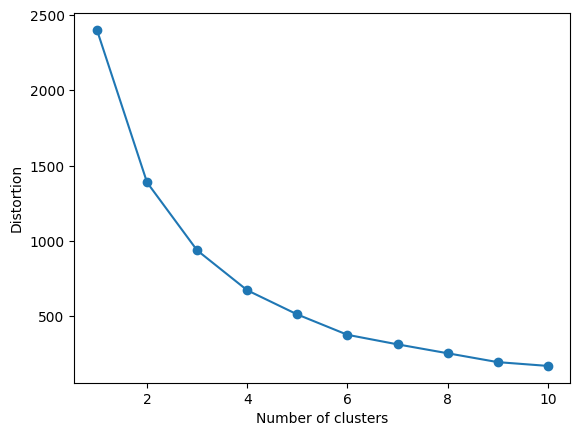

In [ ]:
#Form the dataframe on which to tune the model

condensed_df = pd.DataFrame(components)

#Use the elbow method to decide how many clusters is appropriate

from sklearn.cluster import KMeans

distortions = []
for i in range(1, 11):
    km = KMeans(n_clusters=i,
                init='k-means++',
                n_init=10,
                max_iter=300,
                tol=0.0001,
                random_state=0)
    km.fit(condensed_df)
    distortions.append(km.inertia_)
plt.plot(range(1, 11), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()

The Elbow Curve plotted above demonstrates the distortion (or inertia) for different numbers of clusters, which decreases as the number of cluster increases. I looked for the elbow point, at which the rate of decrease in distortion slows down significantly. K = 3.

**7. Fit the model (5 points)**

In [ ]:
#Fitting the model
km = KMeans(n_clusters=3,
                init='k-means++',
                n_init=10,
                max_iter=300,
                tol=0.0001,
                random_state=0)
km_predict = km.fit_predict(condensed_df)

**8. Calculate cluster statistics to see how they are differentiated from each other (5 points)**

In [ ]:
# Perform KMeans clustering
km = KMeans(n_clusters=3, init='k-means++', n_init=10, max_iter=300, tol=0.0001, random_state=0)
cluster_predictions = km.fit_predict(X_features)

# Add cluster labels to the DataFrame
X_features['Cluster_Prediction'] = cluster_predictions

# Calculate mean values for each feature within each cluster
cluster_stats = X_features.groupby('Cluster_Prediction').mean()

# Display cluster statistics
cluster_stats

,Age,Attendance (%),Study_Hours_per_Week,Stress_Level (1-10),Sleep_Hours_per_Night,Gender_Male,Department_CS,Department_Engineering,Department_Mathematics,Extracurricular_Activities_Yes,Internet_Access_at_Home_Yes,Parent_Education_Level_High School,Parent_Education_Level_Master's,Parent_Education_Level_PhD,Family_Income_Level_Low,Family_Income_Level_Medium
Cluster_Prediction,,,,,,,,,,,,,,,,
0,0.511451,0.514884,0.501317,0.500705,0.505497,0.501120,0.251680,0.261389,0.234503,0.479462,0.496639,0.228529,0.258402,0.253174,1.0,0.0
1,0.501609,0.509523,0.502242,0.511425,0.498901,0.512249,0.236080,0.253898,0.253898,0.507795,0.468448,0.255382,0.250928,0.250928,0.0,1.0
2,0.513318,0.491364,0.504838,0.489010,0.502374,0.516680,0.245151,0.252909,0.240497,0.530644,0.535299,0.227308,0.245151,0.259891,0.0,0.0


**9. Visualize the clusters -- make sure the binary indicator you created for your label is colored differently (5 points)**

HINT: I want to see if your clusters are **really** differentiating

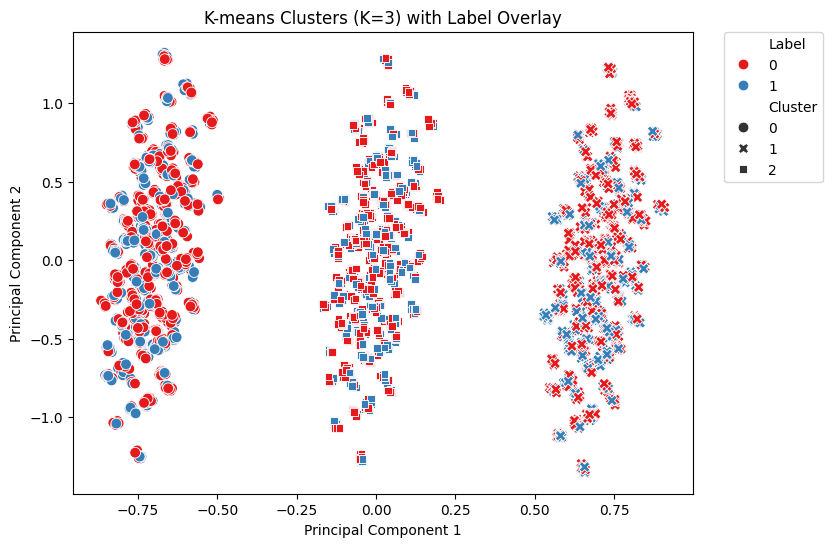

In [ ]:
X_features['Total_Score_Binary'] = df_scaled['Total_Score_Binary']

# Run PCA on selected features (excluding label and cluster prediction)
pca = PCA(n_components=2)
pca_components = pca.fit_transform(X_features.drop(['Cluster_Prediction', 'Total_Score_Binary'], axis=1))

# Prepare dataframe for plotting
plot_df = pd.DataFrame(data=pca_components, columns=['PC1', 'PC2'])
plot_df['Cluster'] = X_features['Cluster_Prediction']
plot_df['Label'] = X_features['Total_Score_Binary']

# Visualization
plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=plot_df,
    x='PC1',
    y='PC2',
    hue='Label',            # Color by label (0 or 1)
    style='Cluster',        # Shape by cluster (1, 2, 3)
    palette='Set1',     # Red/blue colors for 0 and 1
    s=60
)
plt.title('K-means Clusters (K=3) with Label Overlay')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)  # Move legend outside plot
plt.show()